In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
import math
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Concrete_Data.csv")
df

# seperate to X and y
X=df.drop(["CCStr"],axis=1)
y=df["CCStr"]

In [3]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fitting models on Training data 
    lr.fit(X_train, y_train) 
    lasso.fit(X_train, y_train) 
    ridge.fit(X_train, y_train) 
    enet.fit(X_train, y_train) 

    # training and testing with different models and different categorical feature handling methods
    y_pred_lr = lr.predict(X_test) 
    y_pred_lasso = lasso.predict(X_test) 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_enet = enet.predict(X_test)

    list1.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    list2.append(r2_score(y_test, y_pred_lr))
    list3.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    list4.append(r2_score(y_test, y_pred_lasso))
    list5.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    list6.append(r2_score(y_test, y_pred_ridge))
    list7.append(np.sqrt(mean_squared_error(y_test, y_pred_enet)))
    list8.append(r2_score(y_test, y_pred_enet))
    
# print("Model\t\t   RMSE \t  R2") 
# print("Linear Regression  {:.4f} \t{:.4f}".format(list1[2], list2[2])) 
# print("Lasso Regression   {:.4f} \t{:.4f}".format(list3[2], list4[2]))
# print("Ridge Regression   {:.4f} \t{:.4f}".format(list5[2], list6[2]))
# print("Enet Regression    {:.4f} \t{:.4f}".format(list7[2], list8[2]))
print("Finish!!")

Finish!!


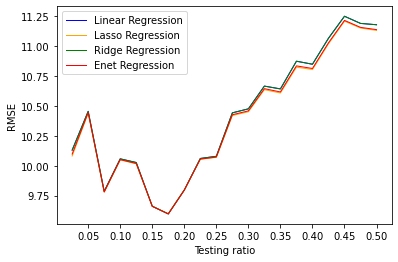

In [5]:
plt.plot(ratio, list1, lw=1, c='blue', label='Linear Regression')  # plot y1
plt.plot(ratio, list3, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list5, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list7, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('RMSE')  # y軸名字
plt.legend()
plt.show()

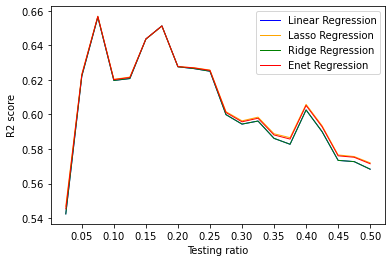

In [6]:
plt.plot(ratio, list2, lw=1, c='blue', ms=4, label='Linear Regression')  # plot y1
plt.plot(ratio, list4, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list6, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list8, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('R2 score')  # y軸名字
plt.legend()
plt.show()

In [6]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
enet.fit(X_train, y_train) 

# training and testing with different models and different categorical feature handling methods
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
y_pred_enet = enet.predict(X_test)
    
print("Model\t\t    RMSE \t  R2") 
print("Linear Regression  {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("Lasso Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("Ridge Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
print("Enet Regression    {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_enet)), r2_score(y_test, y_pred_enet)))

Model		    RMSE 	  R2
Linear Regression  9.6605	0.6436
Lasso Regression   9.6609	0.6436
Ridge Regression   9.6605	0.6436
Enet Regression    9.6595	0.6437


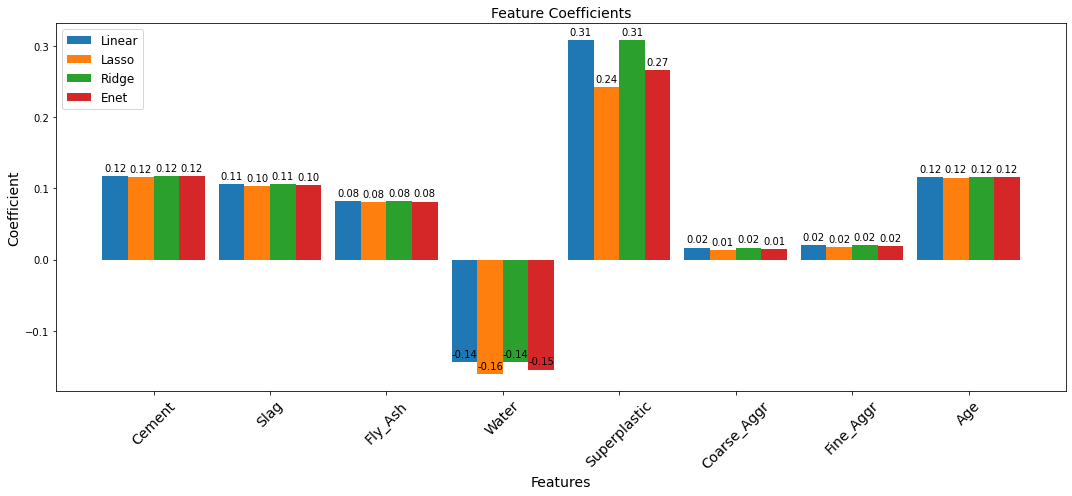

In [7]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
coeff_enet = enet.coef_

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.22
fig, ax = plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - 3*(width/2), coeff_lr, width, label='Linear') 
rects2 = ax.bar(x - 1*(width/2), coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 1*(width/2), coeff_ridge, width, label='Ridge') 
rects4 = ax.bar(x + 3*(width/2), coeff_enet, width, label='Enet') 
ax.set_ylabel('Coefficient', fontsize = 14) 
ax.set_xlabel('Features', fontsize = 14) 
ax.set_title('Feature Coefficients', fontsize = 14) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 14) 
ax.legend(loc=2, fontsize = 12) 
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height.""" 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3)
autolabel(rects4)
fig.tight_layout() 
plt.show()

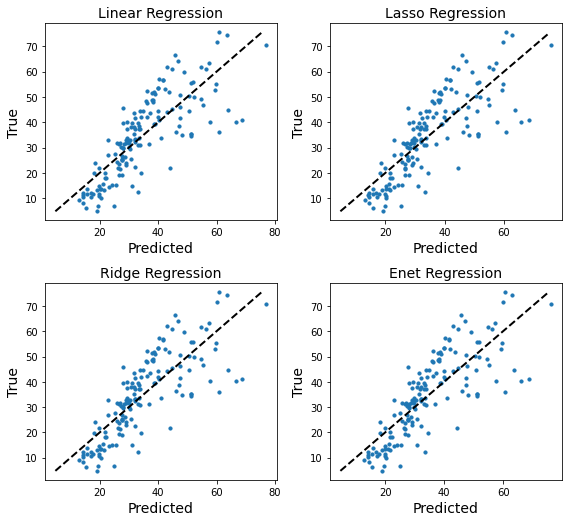

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Linear Regression", fontsize = 14) 

ax2.scatter(y_pred_lasso, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("Lasso Regression", fontsize = 14) 

ax3.scatter(y_pred_ridge, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("Ridge Regression", fontsize = 14) 

ax4.scatter(y_pred_enet, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Enet Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

list9=[]
list10=[]
list11=[]
list12=[]
list13=[]
list14=[]
list15=[]
list16=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    dtr.fit(X_train, y_train) 
    knn.fit(X_train, y_train) 
    mlp.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_dtr = dtr.predict(X_test) 
    y_pred_knn = knn.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    
    list9.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
    list10.append(r2_score(y_test, y_pred_dtr))
    list11.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
    list12.append(r2_score(y_test, y_pred_knn))
    list13.append(np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
    list14.append(r2_score(y_test, y_pred_mlp))
    list15.append(np.sqrt(mean_squared_error(y_test, y_pred_svm)))
    list16.append(r2_score(y_test, y_pred_svm))
    
print("Finish!!")

Finish!!


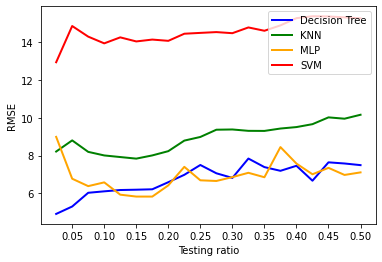

In [21]:
plt.plot(ratio, list9,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list11, lw=2, c='green', label='KNN')
plt.plot(ratio, list13, lw=2, c='orange', label='MLP')
plt.plot(ratio, list15, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

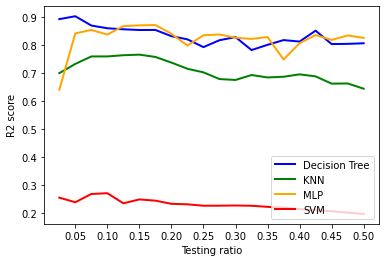

In [23]:
plt.plot(ratio, list10,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list12, lw=2, c='green', label='KNN')
plt.plot(ratio, list14, lw=2, c='orange', label='MLP')
plt.plot(ratio, list16, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend(loc=4)
plt.show()

In [12]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data
dtr.fit(X_train, y_train) 
knn.fit(X_train, y_train) 
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
    
# training and testing with different models and different categorical feature handling methods
y_pred_dtr = dtr.predict(X_test) 
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)
    
print("Model\t\t RMSE \t   R2") 
print("Decision Tree   {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
print("KNN Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)))
print("MLP Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_mlp)), r2_score(y_test, y_pred_mlp)))
print("SVM Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)))

Model		 RMSE 	   R2
Decision Tree   6.5502	 0.8361
KNN Regression  7.8367	 0.7655
MLP Regression  6.3193	 0.8475
SVM Regression  14.0358	 0.2476


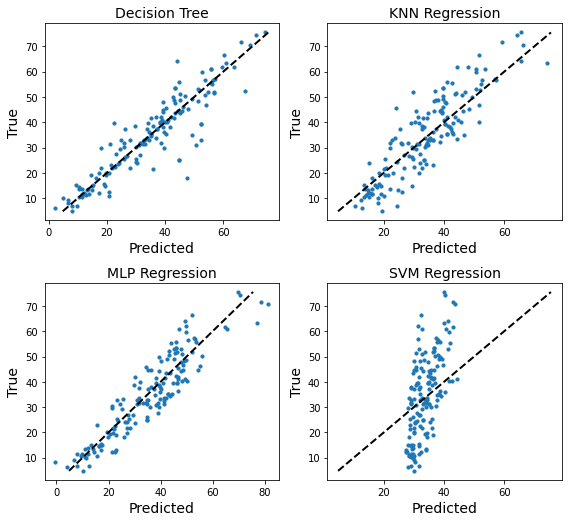

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_dtr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Decision Tree", fontsize = 14) 

ax2.scatter(y_pred_knn, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("KNN Regression", fontsize = 14) 

ax3.scatter(y_pred_mlp, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("MLP Regression", fontsize = 14) 

ax4.scatter(y_pred_svm, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("SVM Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

list17=[]
list18=[]
list19=[]
list20=[]
list21=[]
list22=[]
list23=[]
list24=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    lgbm.fit(X_train, y_train) 
    xgb.fit(X_train, y_train) 
    cat.fit(X_train, y_train) 
    rdf.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_lgbm=lgbm.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    y_pred_cat = cat.predict(X_test)
    y_pred_rdf = rdf.predict(X_test)
    
    list17.append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    list18.append(r2_score(y_test, y_pred_lgbm))
    list19.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    list20.append(r2_score(y_test, y_pred_xgb))
    list21.append(np.sqrt(mean_squared_error(y_test, y_pred_cat)))
    list22.append(r2_score(y_test, y_pred_cat))
    list23.append(np.sqrt(mean_squared_error(y_test, y_pred_rdf)))
    list24.append(r2_score(y_test, y_pred_rdf))

print("Finish!!")    

Learning rate set to 0.040969
0:	learn: 16.3037477	total: 146ms	remaining: 2m 26s
1:	learn: 15.8949698	total: 147ms	remaining: 1m 13s
2:	learn: 15.5585898	total: 148ms	remaining: 49.4s
3:	learn: 15.1637055	total: 150ms	remaining: 37.3s
4:	learn: 14.8206410	total: 151ms	remaining: 30s
5:	learn: 14.4603824	total: 152ms	remaining: 25.1s
6:	learn: 14.1532826	total: 153ms	remaining: 21.6s
7:	learn: 13.8467240	total: 154ms	remaining: 19s
8:	learn: 13.5281782	total: 154ms	remaining: 17s
9:	learn: 13.2162954	total: 155ms	remaining: 15.4s
10:	learn: 12.9154861	total: 156ms	remaining: 14s
11:	learn: 12.6378470	total: 157ms	remaining: 12.9s
12:	learn: 12.3544661	total: 158ms	remaining: 12s
13:	learn: 12.0942458	total: 159ms	remaining: 11.2s
14:	learn: 11.8215804	total: 160ms	remaining: 10.5s
15:	learn: 11.6052484	total: 161ms	remaining: 9.88s
16:	learn: 11.3859971	total: 162ms	remaining: 9.34s
17:	learn: 11.1528782	total: 162ms	remaining: 8.86s
18:	learn: 10.9439774	total: 163ms	remaining: 8.43s


239:	learn: 3.6525137	total: 344ms	remaining: 1.09s
240:	learn: 3.6452249	total: 345ms	remaining: 1.09s
241:	learn: 3.6433518	total: 346ms	remaining: 1.08s
242:	learn: 3.6369280	total: 347ms	remaining: 1.08s
243:	learn: 3.6319437	total: 348ms	remaining: 1.08s
244:	learn: 3.6234962	total: 349ms	remaining: 1.07s
245:	learn: 3.6145252	total: 349ms	remaining: 1.07s
246:	learn: 3.6080425	total: 350ms	remaining: 1.07s
247:	learn: 3.6021994	total: 351ms	remaining: 1.06s
248:	learn: 3.5992760	total: 352ms	remaining: 1.06s
249:	learn: 3.5929333	total: 353ms	remaining: 1.06s
250:	learn: 3.5873756	total: 354ms	remaining: 1.05s
251:	learn: 3.5810498	total: 355ms	remaining: 1.05s
252:	learn: 3.5733454	total: 356ms	remaining: 1.05s
253:	learn: 3.5659821	total: 356ms	remaining: 1.05s
254:	learn: 3.5604446	total: 357ms	remaining: 1.04s
255:	learn: 3.5556915	total: 358ms	remaining: 1.04s
256:	learn: 3.5463583	total: 359ms	remaining: 1.04s
257:	learn: 3.5407071	total: 359ms	remaining: 1.03s
258:	learn: 

450:	learn: 2.7558987	total: 516ms	remaining: 628ms
451:	learn: 2.7521173	total: 517ms	remaining: 627ms
452:	learn: 2.7476539	total: 518ms	remaining: 625ms
453:	learn: 2.7454659	total: 519ms	remaining: 624ms
454:	learn: 2.7415240	total: 520ms	remaining: 622ms
455:	learn: 2.7383074	total: 520ms	remaining: 621ms
456:	learn: 2.7352379	total: 521ms	remaining: 619ms
457:	learn: 2.7311401	total: 522ms	remaining: 618ms
458:	learn: 2.7283804	total: 523ms	remaining: 616ms
459:	learn: 2.7247454	total: 524ms	remaining: 615ms
460:	learn: 2.7214048	total: 524ms	remaining: 613ms
461:	learn: 2.7183188	total: 525ms	remaining: 612ms
462:	learn: 2.7175715	total: 526ms	remaining: 610ms
463:	learn: 2.7135655	total: 527ms	remaining: 609ms
464:	learn: 2.7130497	total: 528ms	remaining: 608ms
465:	learn: 2.7088078	total: 529ms	remaining: 606ms
466:	learn: 2.7050366	total: 530ms	remaining: 605ms
467:	learn: 2.7029958	total: 531ms	remaining: 603ms
468:	learn: 2.6977851	total: 531ms	remaining: 602ms
469:	learn: 

658:	learn: 2.3087381	total: 689ms	remaining: 357ms
659:	learn: 2.3069684	total: 690ms	remaining: 355ms
660:	learn: 2.3053137	total: 691ms	remaining: 354ms
661:	learn: 2.3029839	total: 692ms	remaining: 353ms
662:	learn: 2.3004400	total: 693ms	remaining: 352ms
663:	learn: 2.2984792	total: 693ms	remaining: 351ms
664:	learn: 2.2961997	total: 694ms	remaining: 350ms
665:	learn: 2.2946800	total: 695ms	remaining: 349ms
666:	learn: 2.2931022	total: 696ms	remaining: 347ms
667:	learn: 2.2913892	total: 697ms	remaining: 346ms
668:	learn: 2.2893990	total: 697ms	remaining: 345ms
669:	learn: 2.2878528	total: 698ms	remaining: 344ms
670:	learn: 2.2862886	total: 699ms	remaining: 343ms
671:	learn: 2.2845629	total: 700ms	remaining: 342ms
672:	learn: 2.2833490	total: 701ms	remaining: 340ms
673:	learn: 2.2819659	total: 702ms	remaining: 339ms
674:	learn: 2.2802732	total: 702ms	remaining: 338ms
675:	learn: 2.2794756	total: 703ms	remaining: 337ms
676:	learn: 2.2765755	total: 704ms	remaining: 336ms
677:	learn: 

878:	learn: 2.0120556	total: 861ms	remaining: 119ms
879:	learn: 2.0113076	total: 862ms	remaining: 118ms
880:	learn: 2.0093778	total: 863ms	remaining: 117ms
881:	learn: 2.0086099	total: 864ms	remaining: 116ms
882:	learn: 2.0075814	total: 865ms	remaining: 115ms
883:	learn: 2.0064766	total: 866ms	remaining: 114ms
884:	learn: 2.0056885	total: 867ms	remaining: 113ms
885:	learn: 2.0037589	total: 867ms	remaining: 112ms
886:	learn: 2.0028203	total: 868ms	remaining: 111ms
887:	learn: 2.0025302	total: 869ms	remaining: 110ms
888:	learn: 2.0012737	total: 870ms	remaining: 109ms
889:	learn: 2.0003730	total: 871ms	remaining: 108ms
890:	learn: 1.9997692	total: 872ms	remaining: 107ms
891:	learn: 1.9991059	total: 873ms	remaining: 106ms
892:	learn: 1.9981721	total: 873ms	remaining: 105ms
893:	learn: 1.9969203	total: 874ms	remaining: 104ms
894:	learn: 1.9960180	total: 875ms	remaining: 103ms
895:	learn: 1.9951961	total: 876ms	remaining: 102ms
896:	learn: 1.9940862	total: 877ms	remaining: 101ms
897:	learn: 

194:	learn: 3.9818444	total: 166ms	remaining: 686ms
195:	learn: 3.9762484	total: 167ms	remaining: 685ms
196:	learn: 3.9665578	total: 168ms	remaining: 684ms
197:	learn: 3.9600255	total: 169ms	remaining: 683ms
198:	learn: 3.9549191	total: 169ms	remaining: 682ms
199:	learn: 3.9496077	total: 170ms	remaining: 681ms
200:	learn: 3.9437312	total: 171ms	remaining: 679ms
201:	learn: 3.9395683	total: 172ms	remaining: 678ms
202:	learn: 3.9275003	total: 172ms	remaining: 677ms
203:	learn: 3.9187794	total: 173ms	remaining: 676ms
204:	learn: 3.9142317	total: 174ms	remaining: 676ms
205:	learn: 3.9063308	total: 175ms	remaining: 675ms
206:	learn: 3.8962615	total: 176ms	remaining: 674ms
207:	learn: 3.8843496	total: 177ms	remaining: 672ms
208:	learn: 3.8769212	total: 177ms	remaining: 671ms
209:	learn: 3.8706366	total: 178ms	remaining: 670ms
210:	learn: 3.8591021	total: 179ms	remaining: 669ms
211:	learn: 3.8540510	total: 180ms	remaining: 669ms
212:	learn: 3.8463351	total: 181ms	remaining: 668ms
213:	learn: 

411:	learn: 2.8852676	total: 338ms	remaining: 482ms
412:	learn: 2.8846362	total: 339ms	remaining: 481ms
413:	learn: 2.8772105	total: 339ms	remaining: 480ms
414:	learn: 2.8757193	total: 340ms	remaining: 479ms
415:	learn: 2.8742719	total: 341ms	remaining: 479ms
416:	learn: 2.8713745	total: 342ms	remaining: 478ms
417:	learn: 2.8692097	total: 343ms	remaining: 478ms
418:	learn: 2.8668448	total: 344ms	remaining: 477ms
419:	learn: 2.8631367	total: 345ms	remaining: 476ms
420:	learn: 2.8600025	total: 346ms	remaining: 475ms
421:	learn: 2.8567014	total: 347ms	remaining: 475ms
422:	learn: 2.8552804	total: 347ms	remaining: 474ms
423:	learn: 2.8538210	total: 349ms	remaining: 474ms
424:	learn: 2.8505687	total: 350ms	remaining: 473ms
425:	learn: 2.8422031	total: 350ms	remaining: 472ms
426:	learn: 2.8388024	total: 351ms	remaining: 471ms
427:	learn: 2.8338789	total: 352ms	remaining: 470ms
428:	learn: 2.8298779	total: 353ms	remaining: 470ms
429:	learn: 2.8277648	total: 354ms	remaining: 469ms
430:	learn: 

631:	learn: 2.3735777	total: 509ms	remaining: 297ms
632:	learn: 2.3706609	total: 510ms	remaining: 296ms
633:	learn: 2.3690855	total: 511ms	remaining: 295ms
634:	learn: 2.3689819	total: 512ms	remaining: 294ms
635:	learn: 2.3678118	total: 513ms	remaining: 294ms
636:	learn: 2.3663308	total: 514ms	remaining: 293ms
637:	learn: 2.3648279	total: 515ms	remaining: 292ms
638:	learn: 2.3629597	total: 515ms	remaining: 291ms
639:	learn: 2.3593781	total: 516ms	remaining: 290ms
640:	learn: 2.3585615	total: 517ms	remaining: 290ms
641:	learn: 2.3555030	total: 518ms	remaining: 289ms
642:	learn: 2.3528674	total: 519ms	remaining: 288ms
643:	learn: 2.3522583	total: 519ms	remaining: 287ms
644:	learn: 2.3501685	total: 520ms	remaining: 286ms
645:	learn: 2.3484285	total: 521ms	remaining: 286ms
646:	learn: 2.3463433	total: 522ms	remaining: 285ms
647:	learn: 2.3438226	total: 523ms	remaining: 284ms
648:	learn: 2.3409382	total: 523ms	remaining: 283ms
649:	learn: 2.3392229	total: 524ms	remaining: 282ms
650:	learn: 

849:	learn: 2.0474253	total: 681ms	remaining: 120ms
850:	learn: 2.0459983	total: 682ms	remaining: 119ms
851:	learn: 2.0448352	total: 683ms	remaining: 119ms
852:	learn: 2.0439551	total: 684ms	remaining: 118ms
853:	learn: 2.0425215	total: 685ms	remaining: 117ms
854:	learn: 2.0418949	total: 686ms	remaining: 116ms
855:	learn: 2.0405193	total: 686ms	remaining: 115ms
856:	learn: 2.0391698	total: 687ms	remaining: 115ms
857:	learn: 2.0373007	total: 688ms	remaining: 114ms
858:	learn: 2.0364067	total: 689ms	remaining: 113ms
859:	learn: 2.0347232	total: 690ms	remaining: 112ms
860:	learn: 2.0346790	total: 690ms	remaining: 111ms
861:	learn: 2.0331811	total: 691ms	remaining: 111ms
862:	learn: 2.0319195	total: 692ms	remaining: 110ms
863:	learn: 2.0307335	total: 693ms	remaining: 109ms
864:	learn: 2.0297519	total: 694ms	remaining: 108ms
865:	learn: 2.0283155	total: 694ms	remaining: 107ms
866:	learn: 2.0266218	total: 695ms	remaining: 107ms
867:	learn: 2.0265638	total: 696ms	remaining: 106ms
868:	learn: 

199:	learn: 3.9114034	total: 168ms	remaining: 673ms
200:	learn: 3.9011163	total: 169ms	remaining: 672ms
201:	learn: 3.8935992	total: 170ms	remaining: 671ms
202:	learn: 3.8868309	total: 171ms	remaining: 670ms
203:	learn: 3.8831525	total: 171ms	remaining: 669ms
204:	learn: 3.8780237	total: 172ms	remaining: 667ms
205:	learn: 3.8681066	total: 173ms	remaining: 666ms
206:	learn: 3.8572313	total: 174ms	remaining: 666ms
207:	learn: 3.8522746	total: 175ms	remaining: 666ms
208:	learn: 3.8476562	total: 176ms	remaining: 665ms
209:	learn: 3.8342258	total: 176ms	remaining: 664ms
210:	learn: 3.8282531	total: 177ms	remaining: 663ms
211:	learn: 3.8172568	total: 178ms	remaining: 662ms
212:	learn: 3.8052906	total: 179ms	remaining: 661ms
213:	learn: 3.7948607	total: 180ms	remaining: 660ms
214:	learn: 3.7861094	total: 180ms	remaining: 659ms
215:	learn: 3.7840739	total: 181ms	remaining: 658ms
216:	learn: 3.7748877	total: 182ms	remaining: 657ms
217:	learn: 3.7681081	total: 183ms	remaining: 658ms
218:	learn: 

416:	learn: 2.8078427	total: 339ms	remaining: 474ms
417:	learn: 2.8046070	total: 339ms	remaining: 473ms
418:	learn: 2.7997333	total: 340ms	remaining: 472ms
419:	learn: 2.7966821	total: 341ms	remaining: 471ms
420:	learn: 2.7942897	total: 342ms	remaining: 470ms
421:	learn: 2.7916147	total: 343ms	remaining: 470ms
422:	learn: 2.7911028	total: 344ms	remaining: 469ms
423:	learn: 2.7901507	total: 344ms	remaining: 468ms
424:	learn: 2.7866371	total: 345ms	remaining: 467ms
425:	learn: 2.7837973	total: 346ms	remaining: 466ms
426:	learn: 2.7830310	total: 347ms	remaining: 465ms
427:	learn: 2.7803588	total: 347ms	remaining: 464ms
428:	learn: 2.7756926	total: 348ms	remaining: 463ms
429:	learn: 2.7751701	total: 349ms	remaining: 462ms
430:	learn: 2.7742728	total: 350ms	remaining: 461ms
431:	learn: 2.7690833	total: 350ms	remaining: 461ms
432:	learn: 2.7639765	total: 351ms	remaining: 460ms
433:	learn: 2.7614683	total: 352ms	remaining: 459ms
434:	learn: 2.7581928	total: 353ms	remaining: 458ms
435:	learn: 

642:	learn: 2.2963966	total: 511ms	remaining: 284ms
643:	learn: 2.2945846	total: 512ms	remaining: 283ms
644:	learn: 2.2931296	total: 512ms	remaining: 282ms
645:	learn: 2.2906825	total: 513ms	remaining: 281ms
646:	learn: 2.2887011	total: 514ms	remaining: 280ms
647:	learn: 2.2873828	total: 515ms	remaining: 280ms
648:	learn: 2.2853395	total: 515ms	remaining: 279ms
649:	learn: 2.2831794	total: 516ms	remaining: 278ms
650:	learn: 2.2813865	total: 517ms	remaining: 277ms
651:	learn: 2.2801745	total: 518ms	remaining: 277ms
652:	learn: 2.2777265	total: 519ms	remaining: 276ms
653:	learn: 2.2757281	total: 520ms	remaining: 275ms
654:	learn: 2.2737770	total: 521ms	remaining: 274ms
655:	learn: 2.2726931	total: 522ms	remaining: 274ms
656:	learn: 2.2713456	total: 523ms	remaining: 273ms
657:	learn: 2.2697258	total: 524ms	remaining: 272ms
658:	learn: 2.2694442	total: 525ms	remaining: 271ms
659:	learn: 2.2669287	total: 526ms	remaining: 271ms
660:	learn: 2.2668278	total: 526ms	remaining: 270ms
661:	learn: 

863:	learn: 2.0068970	total: 682ms	remaining: 107ms
864:	learn: 2.0061071	total: 683ms	remaining: 107ms
865:	learn: 2.0056539	total: 683ms	remaining: 106ms
866:	learn: 2.0049898	total: 684ms	remaining: 105ms
867:	learn: 2.0033544	total: 685ms	remaining: 104ms
868:	learn: 2.0031210	total: 685ms	remaining: 103ms
869:	learn: 2.0018156	total: 686ms	remaining: 103ms
870:	learn: 2.0000208	total: 687ms	remaining: 102ms
871:	learn: 1.9988225	total: 688ms	remaining: 101ms
872:	learn: 1.9983119	total: 688ms	remaining: 100ms
873:	learn: 1.9982603	total: 689ms	remaining: 99.4ms
874:	learn: 1.9972753	total: 690ms	remaining: 98.6ms
875:	learn: 1.9960556	total: 691ms	remaining: 97.8ms
876:	learn: 1.9946299	total: 692ms	remaining: 97ms
877:	learn: 1.9940232	total: 693ms	remaining: 96.2ms
878:	learn: 1.9933824	total: 693ms	remaining: 95.5ms
879:	learn: 1.9920767	total: 694ms	remaining: 94.7ms
880:	learn: 1.9911413	total: 695ms	remaining: 93.9ms
881:	learn: 1.9902851	total: 696ms	remaining: 93.1ms
882:	

194:	learn: 3.9713066	total: 165ms	remaining: 680ms
195:	learn: 3.9665160	total: 165ms	remaining: 679ms
196:	learn: 3.9645591	total: 166ms	remaining: 678ms
197:	learn: 3.9585686	total: 167ms	remaining: 677ms
198:	learn: 3.9525119	total: 168ms	remaining: 675ms
199:	learn: 3.9453114	total: 169ms	remaining: 675ms
200:	learn: 3.9358841	total: 169ms	remaining: 674ms
201:	learn: 3.9298317	total: 170ms	remaining: 673ms
202:	learn: 3.9172258	total: 171ms	remaining: 672ms
203:	learn: 3.9089693	total: 172ms	remaining: 671ms
204:	learn: 3.9002849	total: 173ms	remaining: 670ms
205:	learn: 3.8919167	total: 174ms	remaining: 671ms
206:	learn: 3.8824131	total: 175ms	remaining: 671ms
207:	learn: 3.8748271	total: 176ms	remaining: 671ms
208:	learn: 3.8663600	total: 177ms	remaining: 670ms
209:	learn: 3.8618500	total: 178ms	remaining: 670ms
210:	learn: 3.8538321	total: 179ms	remaining: 670ms
211:	learn: 3.8438654	total: 180ms	remaining: 670ms
212:	learn: 3.8386442	total: 181ms	remaining: 669ms
213:	learn: 

399:	learn: 2.8949731	total: 335ms	remaining: 503ms
400:	learn: 2.8908741	total: 336ms	remaining: 502ms
401:	learn: 2.8852516	total: 337ms	remaining: 501ms
402:	learn: 2.8848856	total: 338ms	remaining: 500ms
403:	learn: 2.8824807	total: 338ms	remaining: 499ms
404:	learn: 2.8768455	total: 339ms	remaining: 498ms
405:	learn: 2.8748453	total: 340ms	remaining: 497ms
406:	learn: 2.8708756	total: 341ms	remaining: 496ms
407:	learn: 2.8682008	total: 341ms	remaining: 495ms
408:	learn: 2.8624067	total: 342ms	remaining: 495ms
409:	learn: 2.8593397	total: 343ms	remaining: 494ms
410:	learn: 2.8549404	total: 344ms	remaining: 493ms
411:	learn: 2.8502408	total: 345ms	remaining: 492ms
412:	learn: 2.8465350	total: 345ms	remaining: 491ms
413:	learn: 2.8412022	total: 346ms	remaining: 490ms
414:	learn: 2.8384231	total: 347ms	remaining: 489ms
415:	learn: 2.8373680	total: 348ms	remaining: 488ms
416:	learn: 2.8342828	total: 349ms	remaining: 487ms
417:	learn: 2.8315254	total: 349ms	remaining: 486ms
418:	learn: 

621:	learn: 2.3746851	total: 507ms	remaining: 308ms
622:	learn: 2.3727125	total: 508ms	remaining: 307ms
623:	learn: 2.3707183	total: 509ms	remaining: 307ms
624:	learn: 2.3680788	total: 510ms	remaining: 306ms
625:	learn: 2.3672324	total: 510ms	remaining: 305ms
626:	learn: 2.3652347	total: 511ms	remaining: 304ms
627:	learn: 2.3630469	total: 512ms	remaining: 303ms
628:	learn: 2.3608122	total: 513ms	remaining: 303ms
629:	learn: 2.3589439	total: 514ms	remaining: 302ms
630:	learn: 2.3567281	total: 515ms	remaining: 301ms
631:	learn: 2.3562612	total: 516ms	remaining: 300ms
632:	learn: 2.3547136	total: 517ms	remaining: 300ms
633:	learn: 2.3529276	total: 517ms	remaining: 299ms
634:	learn: 2.3512099	total: 518ms	remaining: 298ms
635:	learn: 2.3484011	total: 519ms	remaining: 297ms
636:	learn: 2.3466917	total: 520ms	remaining: 296ms
637:	learn: 2.3448281	total: 521ms	remaining: 295ms
638:	learn: 2.3425270	total: 522ms	remaining: 295ms
639:	learn: 2.3407153	total: 522ms	remaining: 294ms
640:	learn: 

837:	learn: 2.0660864	total: 678ms	remaining: 131ms
838:	learn: 2.0647994	total: 679ms	remaining: 130ms
839:	learn: 2.0628956	total: 680ms	remaining: 129ms
840:	learn: 2.0619725	total: 680ms	remaining: 129ms
841:	learn: 2.0608699	total: 681ms	remaining: 128ms
842:	learn: 2.0598266	total: 682ms	remaining: 127ms
843:	learn: 2.0583860	total: 683ms	remaining: 126ms
844:	learn: 2.0576376	total: 684ms	remaining: 125ms
845:	learn: 2.0570194	total: 684ms	remaining: 125ms
846:	learn: 2.0555911	total: 685ms	remaining: 124ms
847:	learn: 2.0539637	total: 686ms	remaining: 123ms
848:	learn: 2.0528845	total: 687ms	remaining: 122ms
849:	learn: 2.0520886	total: 687ms	remaining: 121ms
850:	learn: 2.0514362	total: 688ms	remaining: 121ms
851:	learn: 2.0504101	total: 689ms	remaining: 120ms
852:	learn: 2.0501652	total: 690ms	remaining: 119ms
853:	learn: 2.0492990	total: 691ms	remaining: 118ms
854:	learn: 2.0478256	total: 692ms	remaining: 117ms
855:	learn: 2.0469047	total: 692ms	remaining: 116ms
856:	learn: 

Learning rate set to 0.040274
0:	learn: 16.3524013	total: 1.04ms	remaining: 1.04s
1:	learn: 15.9316605	total: 1.87ms	remaining: 934ms
2:	learn: 15.5981999	total: 3.44ms	remaining: 1.14s
3:	learn: 15.2115532	total: 4.26ms	remaining: 1.06s
4:	learn: 14.8351423	total: 5.08ms	remaining: 1.01s
5:	learn: 14.4850695	total: 5.88ms	remaining: 975ms
6:	learn: 14.1872278	total: 6.83ms	remaining: 969ms
7:	learn: 13.8763268	total: 8.07ms	remaining: 1s
8:	learn: 13.5702212	total: 8.99ms	remaining: 990ms
9:	learn: 13.2674004	total: 10ms	remaining: 990ms
10:	learn: 12.9822975	total: 10.8ms	remaining: 973ms
11:	learn: 12.7122303	total: 12ms	remaining: 988ms
12:	learn: 12.4641010	total: 12.9ms	remaining: 977ms
13:	learn: 12.2083622	total: 13.6ms	remaining: 960ms
14:	learn: 11.9697933	total: 14.9ms	remaining: 976ms
15:	learn: 11.7236968	total: 15.7ms	remaining: 963ms
16:	learn: 11.4841318	total: 17.1ms	remaining: 991ms
17:	learn: 11.2631019	total: 17.9ms	remaining: 978ms
18:	learn: 11.0317575	total: 18.7

201:	learn: 3.9187086	total: 169ms	remaining: 669ms
202:	learn: 3.9128514	total: 170ms	remaining: 668ms
203:	learn: 3.9066958	total: 171ms	remaining: 667ms
204:	learn: 3.8977873	total: 172ms	remaining: 666ms
205:	learn: 3.8878504	total: 172ms	remaining: 665ms
206:	learn: 3.8828458	total: 173ms	remaining: 663ms
207:	learn: 3.8784073	total: 174ms	remaining: 662ms
208:	learn: 3.8726825	total: 175ms	remaining: 663ms
209:	learn: 3.8634806	total: 176ms	remaining: 661ms
210:	learn: 3.8596680	total: 177ms	remaining: 660ms
211:	learn: 3.8476628	total: 177ms	remaining: 659ms
212:	learn: 3.8364047	total: 178ms	remaining: 658ms
213:	learn: 3.8300073	total: 179ms	remaining: 657ms
214:	learn: 3.8158173	total: 180ms	remaining: 657ms
215:	learn: 3.8133566	total: 181ms	remaining: 656ms
216:	learn: 3.8008956	total: 181ms	remaining: 655ms
217:	learn: 3.7962181	total: 182ms	remaining: 654ms
218:	learn: 3.7934585	total: 183ms	remaining: 652ms
219:	learn: 3.7876523	total: 184ms	remaining: 651ms
220:	learn: 

424:	learn: 2.8301336	total: 342ms	remaining: 463ms
425:	learn: 2.8248873	total: 343ms	remaining: 462ms
426:	learn: 2.8243828	total: 343ms	remaining: 461ms
427:	learn: 2.8203152	total: 344ms	remaining: 460ms
428:	learn: 2.8170052	total: 345ms	remaining: 459ms
429:	learn: 2.8166895	total: 346ms	remaining: 458ms
430:	learn: 2.8130957	total: 347ms	remaining: 457ms
431:	learn: 2.8127947	total: 347ms	remaining: 457ms
432:	learn: 2.8090256	total: 348ms	remaining: 456ms
433:	learn: 2.8066108	total: 349ms	remaining: 455ms
434:	learn: 2.8046343	total: 350ms	remaining: 454ms
435:	learn: 2.8022116	total: 351ms	remaining: 453ms
436:	learn: 2.7986587	total: 351ms	remaining: 453ms
437:	learn: 2.7954416	total: 352ms	remaining: 452ms
438:	learn: 2.7944813	total: 353ms	remaining: 451ms
439:	learn: 2.7915267	total: 354ms	remaining: 451ms
440:	learn: 2.7882582	total: 355ms	remaining: 450ms
441:	learn: 2.7879554	total: 356ms	remaining: 449ms
442:	learn: 2.7866442	total: 356ms	remaining: 448ms
443:	learn: 

642:	learn: 2.3423770	total: 514ms	remaining: 285ms
643:	learn: 2.3414374	total: 515ms	remaining: 284ms
644:	learn: 2.3390938	total: 515ms	remaining: 284ms
645:	learn: 2.3385118	total: 516ms	remaining: 283ms
646:	learn: 2.3379687	total: 517ms	remaining: 282ms
647:	learn: 2.3367936	total: 518ms	remaining: 281ms
648:	learn: 2.3358137	total: 519ms	remaining: 281ms
649:	learn: 2.3339256	total: 520ms	remaining: 280ms
650:	learn: 2.3310620	total: 520ms	remaining: 279ms
651:	learn: 2.3303766	total: 521ms	remaining: 278ms
652:	learn: 2.3286958	total: 522ms	remaining: 277ms
653:	learn: 2.3268786	total: 523ms	remaining: 277ms
654:	learn: 2.3244753	total: 524ms	remaining: 276ms
655:	learn: 2.3217010	total: 525ms	remaining: 275ms
656:	learn: 2.3196679	total: 525ms	remaining: 274ms
657:	learn: 2.3178777	total: 526ms	remaining: 273ms
658:	learn: 2.3155185	total: 527ms	remaining: 273ms
659:	learn: 2.3135600	total: 528ms	remaining: 272ms
660:	learn: 2.3121160	total: 529ms	remaining: 271ms
661:	learn: 

837:	learn: 2.0691951	total: 686ms	remaining: 133ms
838:	learn: 2.0676654	total: 686ms	remaining: 132ms
839:	learn: 2.0671532	total: 687ms	remaining: 131ms
840:	learn: 2.0659849	total: 688ms	remaining: 130ms
841:	learn: 2.0638315	total: 689ms	remaining: 129ms
842:	learn: 2.0625594	total: 690ms	remaining: 128ms
843:	learn: 2.0604751	total: 690ms	remaining: 128ms
844:	learn: 2.0590134	total: 691ms	remaining: 127ms
845:	learn: 2.0577657	total: 692ms	remaining: 126ms
846:	learn: 2.0561454	total: 693ms	remaining: 125ms
847:	learn: 2.0545801	total: 694ms	remaining: 124ms
848:	learn: 2.0521982	total: 694ms	remaining: 124ms
849:	learn: 2.0508923	total: 695ms	remaining: 123ms
850:	learn: 2.0499959	total: 696ms	remaining: 122ms
851:	learn: 2.0485783	total: 697ms	remaining: 121ms
852:	learn: 2.0480920	total: 698ms	remaining: 120ms
853:	learn: 2.0467240	total: 699ms	remaining: 119ms
854:	learn: 2.0453849	total: 700ms	remaining: 119ms
855:	learn: 2.0445095	total: 700ms	remaining: 118ms
856:	learn: 

Learning rate set to 0.040088
0:	learn: 16.3780736	total: 1.1ms	remaining: 1.09s
1:	learn: 15.9686949	total: 1.94ms	remaining: 969ms
2:	learn: 15.6387945	total: 3.59ms	remaining: 1.19s
3:	learn: 15.2547883	total: 4.39ms	remaining: 1.09s
4:	learn: 14.8805369	total: 5.2ms	remaining: 1.03s
5:	learn: 14.5318305	total: 6ms	remaining: 994ms
6:	learn: 14.2353749	total: 6.96ms	remaining: 988ms
7:	learn: 13.9234688	total: 8.33ms	remaining: 1.03s
8:	learn: 13.6127521	total: 9.15ms	remaining: 1.01s
9:	learn: 13.3158035	total: 9.98ms	remaining: 988ms
10:	learn: 13.0189866	total: 10.8ms	remaining: 970ms
11:	learn: 12.7521378	total: 12.5ms	remaining: 1.03s
12:	learn: 12.5024558	total: 13.3ms	remaining: 1.01s
13:	learn: 12.2515884	total: 14.1ms	remaining: 994ms
14:	learn: 11.9914358	total: 14.9ms	remaining: 980ms
15:	learn: 11.7564018	total: 15.7ms	remaining: 965ms
16:	learn: 11.5296967	total: 17.5ms	remaining: 1.01s
17:	learn: 11.3069595	total: 18.3ms	remaining: 998ms
18:	learn: 11.1219247	total: 19

199:	learn: 3.9203266	total: 171ms	remaining: 683ms
200:	learn: 3.9137621	total: 171ms	remaining: 681ms
201:	learn: 3.9112565	total: 172ms	remaining: 680ms
202:	learn: 3.9044202	total: 173ms	remaining: 681ms
203:	learn: 3.8981291	total: 174ms	remaining: 679ms
204:	learn: 3.8922425	total: 175ms	remaining: 680ms
205:	learn: 3.8868750	total: 176ms	remaining: 680ms
206:	learn: 3.8828405	total: 177ms	remaining: 678ms
207:	learn: 3.8773449	total: 178ms	remaining: 677ms
208:	learn: 3.8686353	total: 179ms	remaining: 676ms
209:	learn: 3.8575591	total: 179ms	remaining: 675ms
210:	learn: 3.8500229	total: 180ms	remaining: 674ms
211:	learn: 3.8440578	total: 181ms	remaining: 672ms
212:	learn: 3.8367968	total: 182ms	remaining: 672ms
213:	learn: 3.8286756	total: 183ms	remaining: 671ms
214:	learn: 3.8234743	total: 183ms	remaining: 670ms
215:	learn: 3.8214644	total: 184ms	remaining: 668ms
216:	learn: 3.8161252	total: 185ms	remaining: 667ms
217:	learn: 3.8119644	total: 186ms	remaining: 666ms
218:	learn: 

419:	learn: 2.8727428	total: 343ms	remaining: 473ms
420:	learn: 2.8673043	total: 344ms	remaining: 473ms
421:	learn: 2.8652737	total: 344ms	remaining: 472ms
422:	learn: 2.8629898	total: 345ms	remaining: 471ms
423:	learn: 2.8569276	total: 346ms	remaining: 470ms
424:	learn: 2.8532743	total: 347ms	remaining: 469ms
425:	learn: 2.8500299	total: 348ms	remaining: 469ms
426:	learn: 2.8478024	total: 349ms	remaining: 468ms
427:	learn: 2.8451156	total: 349ms	remaining: 467ms
428:	learn: 2.8447795	total: 350ms	remaining: 466ms
429:	learn: 2.8423907	total: 351ms	remaining: 465ms
430:	learn: 2.8401973	total: 352ms	remaining: 464ms
431:	learn: 2.8351776	total: 353ms	remaining: 464ms
432:	learn: 2.8346334	total: 353ms	remaining: 463ms
433:	learn: 2.8330928	total: 354ms	remaining: 462ms
434:	learn: 2.8299830	total: 355ms	remaining: 461ms
435:	learn: 2.8271930	total: 356ms	remaining: 461ms
436:	learn: 2.8267968	total: 357ms	remaining: 460ms
437:	learn: 2.8248504	total: 358ms	remaining: 459ms
438:	learn: 

635:	learn: 2.3692366	total: 515ms	remaining: 295ms
636:	learn: 2.3663615	total: 515ms	remaining: 294ms
637:	learn: 2.3640614	total: 516ms	remaining: 293ms
638:	learn: 2.3634249	total: 517ms	remaining: 292ms
639:	learn: 2.3621281	total: 518ms	remaining: 291ms
640:	learn: 2.3609802	total: 519ms	remaining: 291ms
641:	learn: 2.3581277	total: 520ms	remaining: 290ms
642:	learn: 2.3575788	total: 521ms	remaining: 289ms
643:	learn: 2.3563295	total: 521ms	remaining: 288ms
644:	learn: 2.3546187	total: 522ms	remaining: 287ms
645:	learn: 2.3527609	total: 523ms	remaining: 286ms
646:	learn: 2.3506152	total: 524ms	remaining: 286ms
647:	learn: 2.3483531	total: 524ms	remaining: 285ms
648:	learn: 2.3468890	total: 525ms	remaining: 284ms
649:	learn: 2.3433045	total: 526ms	remaining: 283ms
650:	learn: 2.3410514	total: 527ms	remaining: 283ms
651:	learn: 2.3396975	total: 528ms	remaining: 282ms
652:	learn: 2.3376289	total: 529ms	remaining: 281ms
653:	learn: 2.3360238	total: 529ms	remaining: 280ms
654:	learn: 

863:	learn: 2.0464516	total: 688ms	remaining: 108ms
864:	learn: 2.0451162	total: 689ms	remaining: 107ms
865:	learn: 2.0440432	total: 689ms	remaining: 107ms
866:	learn: 2.0429451	total: 698ms	remaining: 107ms
867:	learn: 2.0425989	total: 698ms	remaining: 106ms
868:	learn: 2.0415523	total: 699ms	remaining: 105ms
869:	learn: 2.0406147	total: 700ms	remaining: 105ms
870:	learn: 2.0379808	total: 701ms	remaining: 104ms
871:	learn: 2.0372468	total: 702ms	remaining: 103ms
872:	learn: 2.0360191	total: 703ms	remaining: 102ms
873:	learn: 2.0349949	total: 703ms	remaining: 101ms
874:	learn: 2.0340781	total: 704ms	remaining: 101ms
875:	learn: 2.0329083	total: 705ms	remaining: 99.8ms
876:	learn: 2.0328422	total: 706ms	remaining: 98.9ms
877:	learn: 2.0316863	total: 706ms	remaining: 98.1ms
878:	learn: 2.0308138	total: 707ms	remaining: 97.3ms
879:	learn: 2.0294341	total: 708ms	remaining: 96.5ms
880:	learn: 2.0279516	total: 709ms	remaining: 95.7ms
881:	learn: 2.0270400	total: 709ms	remaining: 94.9ms
882:	

202:	learn: 3.9120378	total: 169ms	remaining: 665ms
203:	learn: 3.9044327	total: 170ms	remaining: 664ms
204:	learn: 3.8950618	total: 171ms	remaining: 664ms
205:	learn: 3.8834985	total: 172ms	remaining: 663ms
206:	learn: 3.8818692	total: 173ms	remaining: 662ms
207:	learn: 3.8749883	total: 174ms	remaining: 661ms
208:	learn: 3.8644431	total: 174ms	remaining: 660ms
209:	learn: 3.8562464	total: 176ms	remaining: 660ms
210:	learn: 3.8522653	total: 176ms	remaining: 659ms
211:	learn: 3.8459867	total: 177ms	remaining: 658ms
212:	learn: 3.8376734	total: 178ms	remaining: 658ms
213:	learn: 3.8358443	total: 179ms	remaining: 657ms
214:	learn: 3.8300586	total: 180ms	remaining: 656ms
215:	learn: 3.8274330	total: 181ms	remaining: 656ms
216:	learn: 3.8141093	total: 182ms	remaining: 655ms
217:	learn: 3.8086980	total: 182ms	remaining: 654ms
218:	learn: 3.8049413	total: 183ms	remaining: 653ms
219:	learn: 3.7948843	total: 185ms	remaining: 656ms
220:	learn: 3.7915782	total: 187ms	remaining: 659ms
221:	learn: 

402:	learn: 2.8632424	total: 341ms	remaining: 504ms
403:	learn: 2.8628683	total: 342ms	remaining: 504ms
404:	learn: 2.8611763	total: 342ms	remaining: 503ms
405:	learn: 2.8555872	total: 343ms	remaining: 502ms
406:	learn: 2.8520844	total: 344ms	remaining: 501ms
407:	learn: 2.8485900	total: 345ms	remaining: 500ms
408:	learn: 2.8482354	total: 345ms	remaining: 499ms
409:	learn: 2.8447872	total: 346ms	remaining: 498ms
410:	learn: 2.8415027	total: 362ms	remaining: 519ms
411:	learn: 2.8380699	total: 363ms	remaining: 518ms
412:	learn: 2.8346320	total: 364ms	remaining: 517ms
413:	learn: 2.8314020	total: 365ms	remaining: 516ms
414:	learn: 2.8276067	total: 365ms	remaining: 515ms
415:	learn: 2.8245240	total: 366ms	remaining: 514ms
416:	learn: 2.8207534	total: 367ms	remaining: 513ms
417:	learn: 2.8203024	total: 368ms	remaining: 512ms
418:	learn: 2.8177063	total: 369ms	remaining: 511ms
419:	learn: 2.8147851	total: 369ms	remaining: 510ms
420:	learn: 2.8111410	total: 370ms	remaining: 509ms
421:	learn: 

608:	learn: 2.3824378	total: 514ms	remaining: 330ms
609:	learn: 2.3822499	total: 514ms	remaining: 329ms
610:	learn: 2.3819877	total: 515ms	remaining: 328ms
611:	learn: 2.3781512	total: 516ms	remaining: 327ms
612:	learn: 2.3763104	total: 517ms	remaining: 326ms
613:	learn: 2.3743194	total: 518ms	remaining: 325ms
614:	learn: 2.3723458	total: 518ms	remaining: 325ms
615:	learn: 2.3713859	total: 519ms	remaining: 324ms
616:	learn: 2.3692683	total: 520ms	remaining: 323ms
617:	learn: 2.3673585	total: 521ms	remaining: 322ms
618:	learn: 2.3655555	total: 522ms	remaining: 321ms
619:	learn: 2.3632659	total: 522ms	remaining: 320ms
620:	learn: 2.3611794	total: 523ms	remaining: 319ms
621:	learn: 2.3609005	total: 524ms	remaining: 318ms
622:	learn: 2.3588446	total: 525ms	remaining: 318ms
623:	learn: 2.3569484	total: 526ms	remaining: 317ms
624:	learn: 2.3551097	total: 526ms	remaining: 316ms
625:	learn: 2.3537829	total: 527ms	remaining: 315ms
626:	learn: 2.3514258	total: 528ms	remaining: 314ms
627:	learn: 

831:	learn: 2.0395919	total: 685ms	remaining: 138ms
832:	learn: 2.0387363	total: 685ms	remaining: 137ms
833:	learn: 2.0370730	total: 686ms	remaining: 137ms
834:	learn: 2.0369505	total: 687ms	remaining: 136ms
835:	learn: 2.0365068	total: 688ms	remaining: 135ms
836:	learn: 2.0347412	total: 689ms	remaining: 134ms
837:	learn: 2.0342209	total: 689ms	remaining: 133ms
838:	learn: 2.0324249	total: 690ms	remaining: 132ms
839:	learn: 2.0313322	total: 691ms	remaining: 132ms
840:	learn: 2.0311316	total: 692ms	remaining: 131ms
841:	learn: 2.0304436	total: 693ms	remaining: 130ms
842:	learn: 2.0290048	total: 693ms	remaining: 129ms
843:	learn: 2.0275074	total: 694ms	remaining: 128ms
844:	learn: 2.0265896	total: 695ms	remaining: 127ms
845:	learn: 2.0259394	total: 696ms	remaining: 127ms
846:	learn: 2.0238780	total: 697ms	remaining: 126ms
847:	learn: 2.0225768	total: 698ms	remaining: 125ms
848:	learn: 2.0205652	total: 699ms	remaining: 124ms
849:	learn: 2.0192432	total: 700ms	remaining: 123ms
850:	learn: 

Learning rate set to 0.03971
0:	learn: 16.4315186	total: 1.04ms	remaining: 1.03s
1:	learn: 16.0294385	total: 1.85ms	remaining: 925ms
2:	learn: 15.7061823	total: 2.77ms	remaining: 919ms
3:	learn: 15.3291547	total: 3.8ms	remaining: 947ms
4:	learn: 14.9924500	total: 4.96ms	remaining: 988ms
5:	learn: 14.6325291	total: 5.91ms	remaining: 980ms
6:	learn: 14.3058608	total: 6.7ms	remaining: 951ms
7:	learn: 14.0119631	total: 7.49ms	remaining: 929ms
8:	learn: 13.7019211	total: 9.04ms	remaining: 996ms
9:	learn: 13.4094500	total: 9.95ms	remaining: 985ms
10:	learn: 13.1217704	total: 10.8ms	remaining: 968ms
11:	learn: 12.8457113	total: 11.7ms	remaining: 963ms
12:	learn: 12.5745612	total: 12.5ms	remaining: 952ms
13:	learn: 12.3228472	total: 14ms	remaining: 985ms
14:	learn: 12.0663170	total: 14.8ms	remaining: 973ms
15:	learn: 11.8265055	total: 15.6ms	remaining: 959ms
16:	learn: 11.5957395	total: 16.4ms	remaining: 950ms
17:	learn: 11.3643152	total: 18.1ms	remaining: 988ms
18:	learn: 11.1587278	total: 19

185:	learn: 4.0185519	total: 160ms	remaining: 699ms
186:	learn: 4.0064565	total: 161ms	remaining: 699ms
187:	learn: 3.9973888	total: 161ms	remaining: 698ms
188:	learn: 3.9915627	total: 162ms	remaining: 696ms
189:	learn: 3.9853240	total: 163ms	remaining: 695ms
190:	learn: 3.9793752	total: 164ms	remaining: 694ms
191:	learn: 3.9717881	total: 165ms	remaining: 693ms
192:	learn: 3.9652538	total: 166ms	remaining: 692ms
193:	learn: 3.9556624	total: 166ms	remaining: 691ms
194:	learn: 3.9423969	total: 167ms	remaining: 690ms
195:	learn: 3.9366920	total: 168ms	remaining: 689ms
196:	learn: 3.9320438	total: 169ms	remaining: 688ms
197:	learn: 3.9287341	total: 170ms	remaining: 687ms
198:	learn: 3.9240470	total: 170ms	remaining: 686ms
199:	learn: 3.9167906	total: 171ms	remaining: 686ms
200:	learn: 3.9129038	total: 172ms	remaining: 685ms
201:	learn: 3.9074997	total: 173ms	remaining: 684ms
202:	learn: 3.8995898	total: 174ms	remaining: 683ms
203:	learn: 3.8932819	total: 175ms	remaining: 682ms
204:	learn: 

395:	learn: 2.9339299	total: 331ms	remaining: 505ms
396:	learn: 2.9312835	total: 332ms	remaining: 504ms
397:	learn: 2.9257936	total: 333ms	remaining: 503ms
398:	learn: 2.9217867	total: 333ms	remaining: 502ms
399:	learn: 2.9175488	total: 334ms	remaining: 501ms
400:	learn: 2.9130881	total: 335ms	remaining: 500ms
401:	learn: 2.9094704	total: 336ms	remaining: 500ms
402:	learn: 2.9066101	total: 337ms	remaining: 499ms
403:	learn: 2.9025128	total: 338ms	remaining: 498ms
404:	learn: 2.8988815	total: 338ms	remaining: 497ms
405:	learn: 2.8983311	total: 339ms	remaining: 496ms
406:	learn: 2.8952728	total: 340ms	remaining: 495ms
407:	learn: 2.8920118	total: 341ms	remaining: 494ms
408:	learn: 2.8859198	total: 342ms	remaining: 494ms
409:	learn: 2.8830640	total: 343ms	remaining: 493ms
410:	learn: 2.8792460	total: 343ms	remaining: 492ms
411:	learn: 2.8788668	total: 344ms	remaining: 491ms
412:	learn: 2.8746068	total: 345ms	remaining: 491ms
413:	learn: 2.8719163	total: 346ms	remaining: 490ms
414:	learn: 

610:	learn: 2.3898069	total: 502ms	remaining: 320ms
611:	learn: 2.3891753	total: 503ms	remaining: 319ms
612:	learn: 2.3864169	total: 504ms	remaining: 318ms
613:	learn: 2.3839042	total: 505ms	remaining: 317ms
614:	learn: 2.3815227	total: 505ms	remaining: 316ms
615:	learn: 2.3798755	total: 506ms	remaining: 316ms
616:	learn: 2.3774728	total: 507ms	remaining: 315ms
617:	learn: 2.3762592	total: 508ms	remaining: 314ms
618:	learn: 2.3742032	total: 509ms	remaining: 313ms
619:	learn: 2.3722549	total: 509ms	remaining: 312ms
620:	learn: 2.3684585	total: 510ms	remaining: 311ms
621:	learn: 2.3656586	total: 511ms	remaining: 311ms
622:	learn: 2.3642890	total: 512ms	remaining: 310ms
623:	learn: 2.3618385	total: 513ms	remaining: 309ms
624:	learn: 2.3616544	total: 513ms	remaining: 308ms
625:	learn: 2.3600162	total: 514ms	remaining: 307ms
626:	learn: 2.3591387	total: 515ms	remaining: 306ms
627:	learn: 2.3577875	total: 516ms	remaining: 305ms
628:	learn: 2.3562465	total: 516ms	remaining: 305ms
629:	learn: 

836:	learn: 2.0444177	total: 674ms	remaining: 131ms
837:	learn: 2.0428140	total: 675ms	remaining: 130ms
838:	learn: 2.0419169	total: 676ms	remaining: 130ms
839:	learn: 2.0418393	total: 677ms	remaining: 129ms
840:	learn: 2.0411872	total: 677ms	remaining: 128ms
841:	learn: 2.0405494	total: 678ms	remaining: 127ms
842:	learn: 2.0393948	total: 679ms	remaining: 126ms
843:	learn: 2.0393319	total: 680ms	remaining: 126ms
844:	learn: 2.0385679	total: 680ms	remaining: 125ms
845:	learn: 2.0380923	total: 681ms	remaining: 124ms
846:	learn: 2.0379534	total: 682ms	remaining: 123ms
847:	learn: 2.0366174	total: 683ms	remaining: 122ms
848:	learn: 2.0354538	total: 684ms	remaining: 122ms
849:	learn: 2.0341366	total: 685ms	remaining: 121ms
850:	learn: 2.0326263	total: 685ms	remaining: 120ms
851:	learn: 2.0308994	total: 686ms	remaining: 119ms
852:	learn: 2.0304178	total: 687ms	remaining: 118ms
853:	learn: 2.0302322	total: 688ms	remaining: 118ms
854:	learn: 2.0292903	total: 688ms	remaining: 117ms
855:	learn: 

Learning rate set to 0.039509
0:	learn: 16.3435927	total: 961us	remaining: 961ms
1:	learn: 15.9354495	total: 1.89ms	remaining: 942ms
2:	learn: 15.5556608	total: 2.92ms	remaining: 969ms
3:	learn: 15.1977239	total: 4.01ms	remaining: 998ms
4:	learn: 14.8529916	total: 4.83ms	remaining: 962ms
5:	learn: 14.5125123	total: 5.66ms	remaining: 937ms
6:	learn: 14.2205673	total: 6.54ms	remaining: 927ms
7:	learn: 13.9174994	total: 8.12ms	remaining: 1.01s
8:	learn: 13.6451125	total: 8.93ms	remaining: 983ms
9:	learn: 13.3523277	total: 9.73ms	remaining: 963ms
10:	learn: 13.0638489	total: 10.6ms	remaining: 954ms
11:	learn: 12.8084413	total: 11.4ms	remaining: 941ms
12:	learn: 12.5404980	total: 13ms	remaining: 985ms
13:	learn: 12.3050957	total: 13.7ms	remaining: 968ms
14:	learn: 12.0633612	total: 14.5ms	remaining: 954ms
15:	learn: 11.8271145	total: 15.3ms	remaining: 943ms
16:	learn: 11.5983180	total: 16.2ms	remaining: 939ms
17:	learn: 11.3819774	total: 17.4ms	remaining: 950ms
18:	learn: 11.2001008	total: 

207:	learn: 3.9303134	total: 170ms	remaining: 649ms
208:	learn: 3.9274380	total: 171ms	remaining: 648ms
209:	learn: 3.9190492	total: 172ms	remaining: 647ms
210:	learn: 3.9065554	total: 173ms	remaining: 646ms
211:	learn: 3.8984009	total: 174ms	remaining: 645ms
212:	learn: 3.8920737	total: 175ms	remaining: 645ms
213:	learn: 3.8832039	total: 175ms	remaining: 644ms
214:	learn: 3.8740482	total: 176ms	remaining: 643ms
215:	learn: 3.8719123	total: 177ms	remaining: 642ms
216:	learn: 3.8637912	total: 178ms	remaining: 641ms
217:	learn: 3.8580692	total: 178ms	remaining: 640ms
218:	learn: 3.8555094	total: 179ms	remaining: 638ms
219:	learn: 3.8526059	total: 180ms	remaining: 637ms
220:	learn: 3.8464411	total: 180ms	remaining: 636ms
221:	learn: 3.8405069	total: 181ms	remaining: 635ms
222:	learn: 3.8314167	total: 182ms	remaining: 635ms
223:	learn: 3.8230297	total: 183ms	remaining: 634ms
224:	learn: 3.8190288	total: 184ms	remaining: 633ms
225:	learn: 3.8169894	total: 184ms	remaining: 632ms
226:	learn: 

434:	learn: 2.8146948	total: 342ms	remaining: 444ms
435:	learn: 2.8111762	total: 342ms	remaining: 443ms
436:	learn: 2.8068811	total: 343ms	remaining: 442ms
437:	learn: 2.8026018	total: 344ms	remaining: 441ms
438:	learn: 2.8002068	total: 345ms	remaining: 440ms
439:	learn: 2.7965139	total: 346ms	remaining: 440ms
440:	learn: 2.7950509	total: 346ms	remaining: 439ms
441:	learn: 2.7946701	total: 347ms	remaining: 438ms
442:	learn: 2.7918964	total: 348ms	remaining: 437ms
443:	learn: 2.7878235	total: 349ms	remaining: 437ms
444:	learn: 2.7866099	total: 350ms	remaining: 436ms
445:	learn: 2.7823089	total: 350ms	remaining: 435ms
446:	learn: 2.7793728	total: 351ms	remaining: 434ms
447:	learn: 2.7775943	total: 352ms	remaining: 434ms
448:	learn: 2.7749180	total: 353ms	remaining: 433ms
449:	learn: 2.7739504	total: 353ms	remaining: 432ms
450:	learn: 2.7694644	total: 354ms	remaining: 431ms
451:	learn: 2.7666287	total: 355ms	remaining: 431ms
452:	learn: 2.7620856	total: 356ms	remaining: 430ms
453:	learn: 

658:	learn: 2.3110264	total: 514ms	remaining: 266ms
659:	learn: 2.3092203	total: 514ms	remaining: 265ms
660:	learn: 2.3076682	total: 516ms	remaining: 264ms
661:	learn: 2.3051350	total: 516ms	remaining: 264ms
662:	learn: 2.3037688	total: 517ms	remaining: 263ms
663:	learn: 2.3027068	total: 519ms	remaining: 262ms
664:	learn: 2.2997917	total: 519ms	remaining: 262ms
665:	learn: 2.2970424	total: 520ms	remaining: 261ms
666:	learn: 2.2968852	total: 521ms	remaining: 260ms
667:	learn: 2.2958027	total: 522ms	remaining: 259ms
668:	learn: 2.2936004	total: 522ms	remaining: 258ms
669:	learn: 2.2910610	total: 523ms	remaining: 258ms
670:	learn: 2.2893524	total: 524ms	remaining: 257ms
671:	learn: 2.2870819	total: 525ms	remaining: 256ms
672:	learn: 2.2853772	total: 526ms	remaining: 255ms
673:	learn: 2.2834914	total: 526ms	remaining: 255ms
674:	learn: 2.2812377	total: 527ms	remaining: 254ms
675:	learn: 2.2799324	total: 528ms	remaining: 253ms
676:	learn: 2.2777647	total: 529ms	remaining: 252ms
677:	learn: 

874:	learn: 2.0135612	total: 686ms	remaining: 98ms
875:	learn: 2.0129594	total: 687ms	remaining: 97.2ms
876:	learn: 2.0114308	total: 688ms	remaining: 96.4ms
877:	learn: 2.0101027	total: 689ms	remaining: 95.7ms
878:	learn: 2.0092893	total: 689ms	remaining: 94.9ms
879:	learn: 2.0071212	total: 690ms	remaining: 94.1ms
880:	learn: 2.0058044	total: 691ms	remaining: 93.3ms
881:	learn: 2.0041008	total: 692ms	remaining: 92.5ms
882:	learn: 2.0031198	total: 692ms	remaining: 91.7ms
883:	learn: 2.0024706	total: 693ms	remaining: 91ms
884:	learn: 2.0015691	total: 694ms	remaining: 90.2ms
885:	learn: 2.0004221	total: 695ms	remaining: 89.4ms
886:	learn: 1.9995838	total: 696ms	remaining: 88.6ms
887:	learn: 1.9981668	total: 696ms	remaining: 87.8ms
888:	learn: 1.9973100	total: 697ms	remaining: 87.1ms
889:	learn: 1.9960895	total: 698ms	remaining: 86.3ms
890:	learn: 1.9946398	total: 699ms	remaining: 85.5ms
891:	learn: 1.9929602	total: 700ms	remaining: 84.7ms
892:	learn: 1.9922033	total: 700ms	remaining: 83.9

197:	learn: 3.9976982	total: 170ms	remaining: 687ms
198:	learn: 3.9850376	total: 170ms	remaining: 686ms
199:	learn: 3.9787897	total: 171ms	remaining: 685ms
200:	learn: 3.9724858	total: 172ms	remaining: 684ms
201:	learn: 3.9678685	total: 173ms	remaining: 683ms
202:	learn: 3.9655352	total: 174ms	remaining: 682ms
203:	learn: 3.9606167	total: 174ms	remaining: 680ms
204:	learn: 3.9505424	total: 175ms	remaining: 679ms
205:	learn: 3.9412295	total: 176ms	remaining: 678ms
206:	learn: 3.9327257	total: 177ms	remaining: 677ms
207:	learn: 3.9243563	total: 177ms	remaining: 676ms
208:	learn: 3.9177803	total: 178ms	remaining: 675ms
209:	learn: 3.9124351	total: 179ms	remaining: 674ms
210:	learn: 3.9064414	total: 180ms	remaining: 672ms
211:	learn: 3.8975679	total: 181ms	remaining: 671ms
212:	learn: 3.8936028	total: 181ms	remaining: 670ms
213:	learn: 3.8889024	total: 182ms	remaining: 669ms
214:	learn: 3.8795476	total: 183ms	remaining: 668ms
215:	learn: 3.8694020	total: 184ms	remaining: 667ms
216:	learn: 

414:	learn: 2.9278417	total: 343ms	remaining: 483ms
415:	learn: 2.9242477	total: 344ms	remaining: 482ms
416:	learn: 2.9218694	total: 344ms	remaining: 481ms
417:	learn: 2.9208289	total: 345ms	remaining: 480ms
418:	learn: 2.9150093	total: 346ms	remaining: 480ms
419:	learn: 2.9116000	total: 347ms	remaining: 479ms
420:	learn: 2.9092702	total: 348ms	remaining: 478ms
421:	learn: 2.9089010	total: 348ms	remaining: 477ms
422:	learn: 2.9085436	total: 349ms	remaining: 476ms
423:	learn: 2.9058079	total: 350ms	remaining: 475ms
424:	learn: 2.9043260	total: 351ms	remaining: 475ms
425:	learn: 2.8982657	total: 351ms	remaining: 474ms
426:	learn: 2.8954173	total: 352ms	remaining: 473ms
427:	learn: 2.8935023	total: 353ms	remaining: 472ms
428:	learn: 2.8901530	total: 354ms	remaining: 471ms
429:	learn: 2.8855219	total: 355ms	remaining: 470ms
430:	learn: 2.8845219	total: 356ms	remaining: 470ms
431:	learn: 2.8831464	total: 357ms	remaining: 469ms
432:	learn: 2.8794810	total: 357ms	remaining: 468ms
433:	learn: 

605:	learn: 2.4661191	total: 514ms	remaining: 334ms
606:	learn: 2.4640612	total: 515ms	remaining: 334ms
607:	learn: 2.4625375	total: 516ms	remaining: 333ms
608:	learn: 2.4583794	total: 517ms	remaining: 332ms
609:	learn: 2.4577053	total: 518ms	remaining: 331ms
610:	learn: 2.4557218	total: 518ms	remaining: 330ms
611:	learn: 2.4543230	total: 519ms	remaining: 329ms
612:	learn: 2.4520694	total: 520ms	remaining: 328ms
613:	learn: 2.4519600	total: 521ms	remaining: 327ms
614:	learn: 2.4504395	total: 522ms	remaining: 327ms
615:	learn: 2.4497139	total: 523ms	remaining: 326ms
616:	learn: 2.4486515	total: 524ms	remaining: 325ms
617:	learn: 2.4453507	total: 524ms	remaining: 324ms
618:	learn: 2.4421424	total: 525ms	remaining: 323ms
619:	learn: 2.4403731	total: 526ms	remaining: 322ms
620:	learn: 2.4392723	total: 527ms	remaining: 322ms
621:	learn: 2.4372489	total: 528ms	remaining: 321ms
622:	learn: 2.4369428	total: 529ms	remaining: 320ms
623:	learn: 2.4362988	total: 529ms	remaining: 319ms
624:	learn: 

807:	learn: 2.1437219	total: 686ms	remaining: 163ms
808:	learn: 2.1422436	total: 686ms	remaining: 162ms
809:	learn: 2.1421283	total: 687ms	remaining: 161ms
810:	learn: 2.1420535	total: 688ms	remaining: 160ms
811:	learn: 2.1406813	total: 689ms	remaining: 160ms
812:	learn: 2.1389242	total: 690ms	remaining: 159ms
813:	learn: 2.1371481	total: 691ms	remaining: 158ms
814:	learn: 2.1357083	total: 692ms	remaining: 157ms
815:	learn: 2.1328595	total: 693ms	remaining: 156ms
816:	learn: 2.1327719	total: 693ms	remaining: 155ms
817:	learn: 2.1317213	total: 694ms	remaining: 154ms
818:	learn: 2.1291484	total: 695ms	remaining: 154ms
819:	learn: 2.1287423	total: 696ms	remaining: 153ms
820:	learn: 2.1267463	total: 697ms	remaining: 152ms
821:	learn: 2.1248994	total: 698ms	remaining: 151ms
822:	learn: 2.1226157	total: 698ms	remaining: 150ms
823:	learn: 2.1207065	total: 699ms	remaining: 149ms
824:	learn: 2.1199390	total: 700ms	remaining: 149ms
825:	learn: 2.1195448	total: 701ms	remaining: 148ms
826:	learn: 

995:	learn: 1.9356847	total: 859ms	remaining: 3.45ms
996:	learn: 1.9351565	total: 859ms	remaining: 2.58ms
997:	learn: 1.9350885	total: 861ms	remaining: 1.72ms
998:	learn: 1.9339645	total: 862ms	remaining: 862us
999:	learn: 1.9324833	total: 862ms	remaining: 0us
Learning rate set to 0.039091
0:	learn: 16.3675244	total: 1.16ms	remaining: 1.16s
1:	learn: 15.9682345	total: 2.08ms	remaining: 1.04s
2:	learn: 15.5972492	total: 3.05ms	remaining: 1.01s
3:	learn: 15.2242376	total: 4.01ms	remaining: 999ms
4:	learn: 14.8559679	total: 5.06ms	remaining: 1.01s
5:	learn: 14.5165961	total: 5.99ms	remaining: 992ms
6:	learn: 14.2179652	total: 6.94ms	remaining: 984ms
7:	learn: 13.9418102	total: 7.88ms	remaining: 977ms
8:	learn: 13.6649113	total: 8.79ms	remaining: 967ms
9:	learn: 13.3904645	total: 9.73ms	remaining: 963ms
10:	learn: 13.0995811	total: 10.7ms	remaining: 960ms
11:	learn: 12.8301042	total: 11.6ms	remaining: 955ms
12:	learn: 12.5667219	total: 12.5ms	remaining: 951ms
13:	learn: 12.3150409	total: 1

160:	learn: 4.2263872	total: 163ms	remaining: 848ms
161:	learn: 4.2170810	total: 164ms	remaining: 847ms
162:	learn: 4.2125630	total: 165ms	remaining: 846ms
163:	learn: 4.2055401	total: 166ms	remaining: 844ms
164:	learn: 4.1974071	total: 166ms	remaining: 842ms
165:	learn: 4.1867492	total: 167ms	remaining: 841ms
166:	learn: 4.1806198	total: 168ms	remaining: 840ms
167:	learn: 4.1708288	total: 170ms	remaining: 841ms
168:	learn: 4.1659476	total: 171ms	remaining: 839ms
169:	learn: 4.1582704	total: 172ms	remaining: 839ms
170:	learn: 4.1501489	total: 173ms	remaining: 839ms
171:	learn: 4.1421619	total: 174ms	remaining: 837ms
172:	learn: 4.1299574	total: 175ms	remaining: 838ms
173:	learn: 4.1205689	total: 176ms	remaining: 837ms
174:	learn: 4.1130506	total: 177ms	remaining: 836ms
175:	learn: 4.1068218	total: 178ms	remaining: 835ms
176:	learn: 4.0968741	total: 179ms	remaining: 834ms
177:	learn: 4.0871516	total: 181ms	remaining: 834ms
178:	learn: 4.0767830	total: 181ms	remaining: 832ms
179:	learn: 

338:	learn: 3.1403494	total: 333ms	remaining: 649ms
339:	learn: 3.1361695	total: 334ms	remaining: 648ms
340:	learn: 3.1309112	total: 335ms	remaining: 647ms
341:	learn: 3.1274939	total: 336ms	remaining: 646ms
342:	learn: 3.1232024	total: 337ms	remaining: 645ms
343:	learn: 3.1216162	total: 338ms	remaining: 644ms
344:	learn: 3.1193502	total: 339ms	remaining: 643ms
345:	learn: 3.1116928	total: 340ms	remaining: 642ms
346:	learn: 3.1070590	total: 341ms	remaining: 641ms
347:	learn: 3.1004414	total: 342ms	remaining: 640ms
348:	learn: 3.0998109	total: 343ms	remaining: 639ms
349:	learn: 3.0944679	total: 344ms	remaining: 638ms
350:	learn: 3.0918320	total: 344ms	remaining: 637ms
351:	learn: 3.0891639	total: 345ms	remaining: 636ms
352:	learn: 3.0860842	total: 346ms	remaining: 635ms
353:	learn: 3.0806070	total: 348ms	remaining: 634ms
354:	learn: 3.0731123	total: 349ms	remaining: 633ms
355:	learn: 3.0681370	total: 349ms	remaining: 632ms
356:	learn: 3.0650574	total: 350ms	remaining: 631ms
357:	learn: 

508:	learn: 2.6039893	total: 492ms	remaining: 475ms
509:	learn: 2.6033885	total: 493ms	remaining: 474ms
510:	learn: 2.5994515	total: 494ms	remaining: 473ms
511:	learn: 2.5981972	total: 495ms	remaining: 472ms
512:	learn: 2.5968043	total: 496ms	remaining: 471ms
513:	learn: 2.5933616	total: 497ms	remaining: 470ms
514:	learn: 2.5911490	total: 498ms	remaining: 469ms
515:	learn: 2.5897477	total: 499ms	remaining: 468ms
516:	learn: 2.5886833	total: 500ms	remaining: 467ms
517:	learn: 2.5856719	total: 501ms	remaining: 466ms
518:	learn: 2.5817986	total: 502ms	remaining: 465ms
519:	learn: 2.5774361	total: 502ms	remaining: 464ms
520:	learn: 2.5749272	total: 503ms	remaining: 463ms
521:	learn: 2.5700107	total: 504ms	remaining: 462ms
522:	learn: 2.5691785	total: 505ms	remaining: 461ms
523:	learn: 2.5662894	total: 506ms	remaining: 460ms
524:	learn: 2.5619150	total: 507ms	remaining: 458ms
525:	learn: 2.5580231	total: 508ms	remaining: 457ms
526:	learn: 2.5567189	total: 509ms	remaining: 456ms
527:	learn: 

700:	learn: 2.2318909	total: 663ms	remaining: 283ms
701:	learn: 2.2302519	total: 664ms	remaining: 282ms
702:	learn: 2.2290618	total: 665ms	remaining: 281ms
703:	learn: 2.2278581	total: 666ms	remaining: 280ms
704:	learn: 2.2248100	total: 668ms	remaining: 279ms
705:	learn: 2.2205532	total: 668ms	remaining: 278ms
706:	learn: 2.2187238	total: 669ms	remaining: 277ms
707:	learn: 2.2171272	total: 670ms	remaining: 276ms
708:	learn: 2.2170023	total: 671ms	remaining: 276ms
709:	learn: 2.2148053	total: 672ms	remaining: 275ms
710:	learn: 2.2138358	total: 673ms	remaining: 274ms
711:	learn: 2.2113461	total: 674ms	remaining: 273ms
712:	learn: 2.2096488	total: 675ms	remaining: 272ms
713:	learn: 2.2081625	total: 676ms	remaining: 271ms
714:	learn: 2.2066979	total: 677ms	remaining: 270ms
715:	learn: 2.2039462	total: 678ms	remaining: 269ms
716:	learn: 2.2030161	total: 679ms	remaining: 268ms
717:	learn: 2.2009114	total: 680ms	remaining: 267ms
718:	learn: 2.1986548	total: 680ms	remaining: 266ms
719:	learn: 

893:	learn: 1.9704302	total: 835ms	remaining: 99ms
894:	learn: 1.9691948	total: 836ms	remaining: 98.1ms
895:	learn: 1.9686406	total: 837ms	remaining: 97.2ms
896:	learn: 1.9676065	total: 838ms	remaining: 96.2ms
897:	learn: 1.9662221	total: 839ms	remaining: 95.3ms
898:	learn: 1.9652167	total: 840ms	remaining: 94.4ms
899:	learn: 1.9647469	total: 841ms	remaining: 93.4ms
900:	learn: 1.9642337	total: 842ms	remaining: 92.5ms
901:	learn: 1.9639887	total: 842ms	remaining: 91.5ms
902:	learn: 1.9620625	total: 843ms	remaining: 90.6ms
903:	learn: 1.9619986	total: 844ms	remaining: 89.6ms
904:	learn: 1.9610523	total: 845ms	remaining: 88.7ms
905:	learn: 1.9604124	total: 846ms	remaining: 87.8ms
906:	learn: 1.9588891	total: 847ms	remaining: 86.8ms
907:	learn: 1.9580868	total: 847ms	remaining: 85.9ms
908:	learn: 1.9568642	total: 848ms	remaining: 84.9ms
909:	learn: 1.9558316	total: 849ms	remaining: 84ms
910:	learn: 1.9549135	total: 850ms	remaining: 83ms
911:	learn: 1.9546272	total: 851ms	remaining: 82.1ms

176:	learn: 4.1771630	total: 162ms	remaining: 754ms
177:	learn: 4.1713297	total: 163ms	remaining: 753ms
178:	learn: 4.1599983	total: 164ms	remaining: 751ms
179:	learn: 4.1526808	total: 165ms	remaining: 750ms
180:	learn: 4.1429344	total: 166ms	remaining: 749ms
181:	learn: 4.1359253	total: 166ms	remaining: 748ms
182:	learn: 4.1267664	total: 167ms	remaining: 746ms
183:	learn: 4.1156981	total: 168ms	remaining: 745ms
184:	learn: 4.1045484	total: 169ms	remaining: 744ms
185:	learn: 4.0992056	total: 170ms	remaining: 742ms
186:	learn: 4.0942310	total: 170ms	remaining: 741ms
187:	learn: 4.0869809	total: 171ms	remaining: 740ms
188:	learn: 4.0785404	total: 172ms	remaining: 739ms
189:	learn: 4.0714531	total: 173ms	remaining: 737ms
190:	learn: 4.0652472	total: 174ms	remaining: 736ms
191:	learn: 4.0576972	total: 175ms	remaining: 735ms
192:	learn: 4.0527120	total: 175ms	remaining: 733ms
193:	learn: 4.0473298	total: 176ms	remaining: 732ms
194:	learn: 4.0394520	total: 177ms	remaining: 731ms
195:	learn: 

381:	learn: 3.0457874	total: 334ms	remaining: 540ms
382:	learn: 3.0405935	total: 334ms	remaining: 539ms
383:	learn: 3.0379452	total: 335ms	remaining: 538ms
384:	learn: 3.0314520	total: 336ms	remaining: 537ms
385:	learn: 3.0309034	total: 337ms	remaining: 536ms
386:	learn: 3.0233154	total: 338ms	remaining: 535ms
387:	learn: 3.0194966	total: 339ms	remaining: 534ms
388:	learn: 3.0150600	total: 340ms	remaining: 533ms
389:	learn: 3.0098707	total: 340ms	remaining: 532ms
390:	learn: 3.0058643	total: 341ms	remaining: 531ms
391:	learn: 3.0054167	total: 342ms	remaining: 530ms
392:	learn: 3.0013438	total: 343ms	remaining: 530ms
393:	learn: 2.9955448	total: 344ms	remaining: 529ms
394:	learn: 2.9950463	total: 344ms	remaining: 528ms
395:	learn: 2.9916841	total: 345ms	remaining: 527ms
396:	learn: 2.9883174	total: 346ms	remaining: 526ms
397:	learn: 2.9845754	total: 347ms	remaining: 525ms
398:	learn: 2.9786012	total: 348ms	remaining: 524ms
399:	learn: 2.9739555	total: 349ms	remaining: 523ms
400:	learn: 

585:	learn: 2.4779502	total: 504ms	remaining: 356ms
586:	learn: 2.4752351	total: 505ms	remaining: 355ms
587:	learn: 2.4745148	total: 506ms	remaining: 355ms
588:	learn: 2.4728174	total: 507ms	remaining: 354ms
589:	learn: 2.4698098	total: 508ms	remaining: 353ms
590:	learn: 2.4696094	total: 508ms	remaining: 352ms
591:	learn: 2.4694363	total: 509ms	remaining: 351ms
592:	learn: 2.4691092	total: 510ms	remaining: 350ms
593:	learn: 2.4668607	total: 511ms	remaining: 349ms
594:	learn: 2.4666442	total: 512ms	remaining: 348ms
595:	learn: 2.4613588	total: 513ms	remaining: 347ms
596:	learn: 2.4584132	total: 513ms	remaining: 347ms
597:	learn: 2.4574585	total: 514ms	remaining: 346ms
598:	learn: 2.4543786	total: 515ms	remaining: 345ms
599:	learn: 2.4524905	total: 516ms	remaining: 344ms
600:	learn: 2.4512887	total: 517ms	remaining: 343ms
601:	learn: 2.4502494	total: 518ms	remaining: 342ms
602:	learn: 2.4488637	total: 518ms	remaining: 341ms
603:	learn: 2.4462227	total: 519ms	remaining: 340ms
604:	learn: 

793:	learn: 2.1314981	total: 676ms	remaining: 175ms
794:	learn: 2.1293874	total: 677ms	remaining: 174ms
795:	learn: 2.1292628	total: 677ms	remaining: 174ms
796:	learn: 2.1274521	total: 678ms	remaining: 173ms
797:	learn: 2.1262118	total: 679ms	remaining: 172ms
798:	learn: 2.1256455	total: 680ms	remaining: 171ms
799:	learn: 2.1238524	total: 681ms	remaining: 170ms
800:	learn: 2.1223617	total: 682ms	remaining: 169ms
801:	learn: 2.1222461	total: 682ms	remaining: 168ms
802:	learn: 2.1219827	total: 683ms	remaining: 168ms
803:	learn: 2.1216950	total: 684ms	remaining: 167ms
804:	learn: 2.1200415	total: 685ms	remaining: 166ms
805:	learn: 2.1191410	total: 686ms	remaining: 165ms
806:	learn: 2.1171223	total: 687ms	remaining: 164ms
807:	learn: 2.1169882	total: 687ms	remaining: 163ms
808:	learn: 2.1152810	total: 688ms	remaining: 162ms
809:	learn: 2.1140478	total: 689ms	remaining: 162ms
810:	learn: 2.1112838	total: 690ms	remaining: 161ms
811:	learn: 2.1089123	total: 691ms	remaining: 160ms
812:	learn: 

996:	learn: 1.8982067	total: 847ms	remaining: 2.55ms
997:	learn: 1.8968125	total: 848ms	remaining: 1.7ms
998:	learn: 1.8962537	total: 849ms	remaining: 850us
999:	learn: 1.8956853	total: 850ms	remaining: 0us
Learning rate set to 0.038656
0:	learn: 16.2556903	total: 1.13ms	remaining: 1.13s
1:	learn: 15.8769653	total: 2.12ms	remaining: 1.06s
2:	learn: 15.5609139	total: 3.1ms	remaining: 1.03s
3:	learn: 15.2009635	total: 4.07ms	remaining: 1.01s
4:	learn: 14.8835597	total: 4.99ms	remaining: 993ms
5:	learn: 14.5557144	total: 6.32ms	remaining: 1.05s
6:	learn: 14.2618673	total: 7.26ms	remaining: 1.03s
7:	learn: 13.9843288	total: 8.29ms	remaining: 1.03s
8:	learn: 13.7184005	total: 9.22ms	remaining: 1.01s
9:	learn: 13.4366900	total: 10.2ms	remaining: 1.01s
10:	learn: 13.1657342	total: 11.1ms	remaining: 997ms
11:	learn: 12.9161405	total: 12.1ms	remaining: 997ms
12:	learn: 12.6481922	total: 13.1ms	remaining: 995ms
13:	learn: 12.3987157	total: 14ms	remaining: 989ms
14:	learn: 12.1351745	total: 15ms	

159:	learn: 4.3327146	total: 158ms	remaining: 827ms
160:	learn: 4.3272910	total: 158ms	remaining: 825ms
161:	learn: 4.3206313	total: 159ms	remaining: 823ms
162:	learn: 4.3123127	total: 160ms	remaining: 821ms
163:	learn: 4.3043264	total: 161ms	remaining: 819ms
164:	learn: 4.2941585	total: 162ms	remaining: 817ms
165:	learn: 4.2871373	total: 162ms	remaining: 815ms
166:	learn: 4.2781536	total: 163ms	remaining: 814ms
167:	learn: 4.2672867	total: 164ms	remaining: 812ms
168:	learn: 4.2567890	total: 165ms	remaining: 810ms
169:	learn: 4.2515017	total: 166ms	remaining: 808ms
170:	learn: 4.2386484	total: 166ms	remaining: 806ms
171:	learn: 4.2327607	total: 167ms	remaining: 804ms
172:	learn: 4.2284806	total: 168ms	remaining: 802ms
173:	learn: 4.2244769	total: 169ms	remaining: 800ms
174:	learn: 4.2173651	total: 169ms	remaining: 798ms
175:	learn: 4.2081522	total: 170ms	remaining: 796ms
176:	learn: 4.2023469	total: 171ms	remaining: 795ms
177:	learn: 4.1995283	total: 172ms	remaining: 793ms
178:	learn: 

368:	learn: 3.0889831	total: 329ms	remaining: 562ms
369:	learn: 3.0862977	total: 330ms	remaining: 561ms
370:	learn: 3.0858484	total: 330ms	remaining: 560ms
371:	learn: 3.0854247	total: 331ms	remaining: 559ms
372:	learn: 3.0847072	total: 332ms	remaining: 558ms
373:	learn: 3.0768335	total: 333ms	remaining: 558ms
374:	learn: 3.0731882	total: 334ms	remaining: 557ms
375:	learn: 3.0687548	total: 335ms	remaining: 556ms
376:	learn: 3.0668979	total: 336ms	remaining: 555ms
377:	learn: 3.0615857	total: 336ms	remaining: 554ms
378:	learn: 3.0582715	total: 337ms	remaining: 553ms
379:	learn: 3.0533599	total: 338ms	remaining: 552ms
380:	learn: 3.0478145	total: 339ms	remaining: 551ms
381:	learn: 3.0437059	total: 340ms	remaining: 550ms
382:	learn: 3.0385535	total: 341ms	remaining: 549ms
383:	learn: 3.0326538	total: 341ms	remaining: 548ms
384:	learn: 3.0265540	total: 342ms	remaining: 547ms
385:	learn: 3.0185860	total: 343ms	remaining: 546ms
386:	learn: 3.0142426	total: 344ms	remaining: 545ms
387:	learn: 

573:	learn: 2.4683672	total: 501ms	remaining: 372ms
574:	learn: 2.4681967	total: 502ms	remaining: 371ms
575:	learn: 2.4663072	total: 503ms	remaining: 370ms
576:	learn: 2.4635132	total: 504ms	remaining: 370ms
577:	learn: 2.4629248	total: 505ms	remaining: 369ms
578:	learn: 2.4587452	total: 506ms	remaining: 368ms
579:	learn: 2.4581831	total: 507ms	remaining: 367ms
580:	learn: 2.4576471	total: 507ms	remaining: 366ms
581:	learn: 2.4550839	total: 508ms	remaining: 365ms
582:	learn: 2.4545720	total: 509ms	remaining: 364ms
583:	learn: 2.4518829	total: 510ms	remaining: 364ms
584:	learn: 2.4502894	total: 511ms	remaining: 363ms
585:	learn: 2.4476270	total: 512ms	remaining: 362ms
586:	learn: 2.4452418	total: 513ms	remaining: 361ms
587:	learn: 2.4416766	total: 514ms	remaining: 360ms
588:	learn: 2.4395019	total: 515ms	remaining: 360ms
589:	learn: 2.4393546	total: 516ms	remaining: 359ms
590:	learn: 2.4362996	total: 517ms	remaining: 358ms
591:	learn: 2.4334281	total: 518ms	remaining: 357ms
592:	learn: 

768:	learn: 2.1284256	total: 672ms	remaining: 202ms
769:	learn: 2.1262676	total: 673ms	remaining: 201ms
770:	learn: 2.1250389	total: 674ms	remaining: 200ms
771:	learn: 2.1249823	total: 675ms	remaining: 199ms
772:	learn: 2.1219574	total: 676ms	remaining: 198ms
773:	learn: 2.1201289	total: 676ms	remaining: 198ms
774:	learn: 2.1200732	total: 677ms	remaining: 196ms
775:	learn: 2.1186088	total: 678ms	remaining: 196ms
776:	learn: 2.1166539	total: 678ms	remaining: 195ms
777:	learn: 2.1150269	total: 679ms	remaining: 194ms
778:	learn: 2.1121598	total: 680ms	remaining: 193ms
779:	learn: 2.1112903	total: 681ms	remaining: 192ms
780:	learn: 2.1099974	total: 682ms	remaining: 191ms
781:	learn: 2.1099342	total: 683ms	remaining: 190ms
782:	learn: 2.1070782	total: 684ms	remaining: 190ms
783:	learn: 2.1056515	total: 685ms	remaining: 189ms
784:	learn: 2.1041038	total: 686ms	remaining: 188ms
785:	learn: 2.1030997	total: 686ms	remaining: 187ms
786:	learn: 2.1000327	total: 687ms	remaining: 186ms
787:	learn: 

972:	learn: 1.9027925	total: 843ms	remaining: 23.4ms
973:	learn: 1.9016507	total: 844ms	remaining: 22.5ms
974:	learn: 1.9016288	total: 844ms	remaining: 21.7ms
975:	learn: 1.9004817	total: 845ms	remaining: 20.8ms
976:	learn: 1.8997798	total: 846ms	remaining: 19.9ms
977:	learn: 1.8997479	total: 846ms	remaining: 19ms
978:	learn: 1.8986323	total: 847ms	remaining: 18.2ms
979:	learn: 1.8979054	total: 848ms	remaining: 17.3ms
980:	learn: 1.8972442	total: 849ms	remaining: 16.4ms
981:	learn: 1.8959788	total: 850ms	remaining: 15.6ms
982:	learn: 1.8939144	total: 851ms	remaining: 14.7ms
983:	learn: 1.8928543	total: 852ms	remaining: 13.8ms
984:	learn: 1.8909530	total: 853ms	remaining: 13ms
985:	learn: 1.8900022	total: 854ms	remaining: 12.1ms
986:	learn: 1.8886976	total: 855ms	remaining: 11.3ms
987:	learn: 1.8882416	total: 855ms	remaining: 10.4ms
988:	learn: 1.8881962	total: 856ms	remaining: 9.52ms
989:	learn: 1.8876505	total: 857ms	remaining: 8.66ms
990:	learn: 1.8862942	total: 858ms	remaining: 7.79

178:	learn: 4.1510993	total: 163ms	remaining: 749ms
179:	learn: 4.1403644	total: 164ms	remaining: 748ms
180:	learn: 4.1301591	total: 165ms	remaining: 746ms
181:	learn: 4.1222448	total: 166ms	remaining: 745ms
182:	learn: 4.1164241	total: 167ms	remaining: 744ms
183:	learn: 4.1078312	total: 167ms	remaining: 742ms
184:	learn: 4.1019093	total: 168ms	remaining: 741ms
185:	learn: 4.0962572	total: 169ms	remaining: 739ms
186:	learn: 4.0937464	total: 170ms	remaining: 738ms
187:	learn: 4.0897085	total: 170ms	remaining: 736ms
188:	learn: 4.0846231	total: 171ms	remaining: 735ms
189:	learn: 4.0758115	total: 172ms	remaining: 733ms
190:	learn: 4.0679719	total: 173ms	remaining: 732ms
191:	learn: 4.0621463	total: 174ms	remaining: 730ms
192:	learn: 4.0579464	total: 174ms	remaining: 729ms
193:	learn: 4.0476481	total: 175ms	remaining: 728ms
194:	learn: 4.0386379	total: 176ms	remaining: 726ms
195:	learn: 4.0348863	total: 177ms	remaining: 725ms
196:	learn: 4.0234816	total: 178ms	remaining: 724ms
197:	learn: 

392:	learn: 2.9545597	total: 335ms	remaining: 517ms
393:	learn: 2.9509318	total: 336ms	remaining: 516ms
394:	learn: 2.9467065	total: 337ms	remaining: 515ms
395:	learn: 2.9462689	total: 337ms	remaining: 514ms
396:	learn: 2.9420667	total: 338ms	remaining: 514ms
397:	learn: 2.9416206	total: 339ms	remaining: 513ms
398:	learn: 2.9357006	total: 340ms	remaining: 512ms
399:	learn: 2.9277461	total: 341ms	remaining: 511ms
400:	learn: 2.9240014	total: 341ms	remaining: 510ms
401:	learn: 2.9211331	total: 342ms	remaining: 509ms
402:	learn: 2.9183218	total: 343ms	remaining: 508ms
403:	learn: 2.9142044	total: 344ms	remaining: 507ms
404:	learn: 2.9086139	total: 345ms	remaining: 506ms
405:	learn: 2.9061109	total: 345ms	remaining: 505ms
406:	learn: 2.8999238	total: 346ms	remaining: 504ms
407:	learn: 2.8963666	total: 347ms	remaining: 504ms
408:	learn: 2.8927330	total: 348ms	remaining: 503ms
409:	learn: 2.8861093	total: 349ms	remaining: 502ms
410:	learn: 2.8826063	total: 349ms	remaining: 501ms
411:	learn: 

601:	learn: 2.4231719	total: 506ms	remaining: 334ms
602:	learn: 2.4210817	total: 507ms	remaining: 334ms
603:	learn: 2.4206905	total: 508ms	remaining: 333ms
604:	learn: 2.4176745	total: 508ms	remaining: 332ms
605:	learn: 2.4153042	total: 509ms	remaining: 331ms
606:	learn: 2.4142934	total: 510ms	remaining: 330ms
607:	learn: 2.4127044	total: 511ms	remaining: 329ms
608:	learn: 2.4091410	total: 512ms	remaining: 328ms
609:	learn: 2.4090045	total: 512ms	remaining: 328ms
610:	learn: 2.4067170	total: 513ms	remaining: 327ms
611:	learn: 2.4039630	total: 514ms	remaining: 326ms
612:	learn: 2.3998300	total: 515ms	remaining: 325ms
613:	learn: 2.3988861	total: 515ms	remaining: 324ms
614:	learn: 2.3948186	total: 516ms	remaining: 323ms
615:	learn: 2.3940501	total: 517ms	remaining: 322ms
616:	learn: 2.3927918	total: 518ms	remaining: 321ms
617:	learn: 2.3923416	total: 519ms	remaining: 321ms
618:	learn: 2.3910544	total: 519ms	remaining: 320ms
619:	learn: 2.3897960	total: 520ms	remaining: 319ms
620:	learn: 

811:	learn: 2.0976290	total: 677ms	remaining: 157ms
812:	learn: 2.0965798	total: 678ms	remaining: 156ms
813:	learn: 2.0953146	total: 679ms	remaining: 155ms
814:	learn: 2.0942950	total: 680ms	remaining: 154ms
815:	learn: 2.0934699	total: 680ms	remaining: 153ms
816:	learn: 2.0927910	total: 681ms	remaining: 153ms
817:	learn: 2.0911982	total: 682ms	remaining: 152ms
818:	learn: 2.0890679	total: 683ms	remaining: 151ms
819:	learn: 2.0876808	total: 684ms	remaining: 150ms
820:	learn: 2.0872847	total: 685ms	remaining: 149ms
821:	learn: 2.0854197	total: 685ms	remaining: 148ms
822:	learn: 2.0849764	total: 686ms	remaining: 148ms
823:	learn: 2.0844413	total: 687ms	remaining: 147ms
824:	learn: 2.0833395	total: 688ms	remaining: 146ms
825:	learn: 2.0823749	total: 689ms	remaining: 145ms
826:	learn: 2.0802645	total: 689ms	remaining: 144ms
827:	learn: 2.0786848	total: 690ms	remaining: 143ms
828:	learn: 2.0779790	total: 691ms	remaining: 143ms
829:	learn: 2.0773869	total: 692ms	remaining: 142ms
830:	learn: 

Learning rate set to 0.038184
0:	learn: 16.2320360	total: 1.26ms	remaining: 1.26s
1:	learn: 15.8529343	total: 2.39ms	remaining: 1.19s
2:	learn: 15.5612901	total: 3.36ms	remaining: 1.12s
3:	learn: 15.2010020	total: 4.27ms	remaining: 1.06s
4:	learn: 14.8931191	total: 5.17ms	remaining: 1.03s
5:	learn: 14.5829956	total: 6.07ms	remaining: 1s
6:	learn: 14.3058276	total: 6.96ms	remaining: 987ms
7:	learn: 14.0166663	total: 8.16ms	remaining: 1.01s
8:	learn: 13.7323869	total: 9.16ms	remaining: 1.01s
9:	learn: 13.4412223	total: 10.1ms	remaining: 999ms
10:	learn: 13.1578489	total: 11ms	remaining: 987ms
11:	learn: 12.9048023	total: 11.9ms	remaining: 980ms
12:	learn: 12.6432998	total: 12.8ms	remaining: 973ms
13:	learn: 12.4080948	total: 15.3ms	remaining: 1.08s
14:	learn: 12.1791310	total: 16.3ms	remaining: 1.07s
15:	learn: 11.9621798	total: 17.2ms	remaining: 1.06s
16:	learn: 11.7419706	total: 18.1ms	remaining: 1.05s
17:	learn: 11.5132730	total: 19ms	remaining: 1.04s
18:	learn: 11.3239589	total: 20ms

178:	learn: 4.1274404	total: 162ms	remaining: 743ms
179:	learn: 4.1163925	total: 163ms	remaining: 743ms
180:	learn: 4.1037793	total: 164ms	remaining: 741ms
181:	learn: 4.0984107	total: 165ms	remaining: 740ms
182:	learn: 4.0915054	total: 165ms	remaining: 738ms
183:	learn: 4.0817758	total: 166ms	remaining: 737ms
184:	learn: 4.0743514	total: 167ms	remaining: 735ms
185:	learn: 4.0687273	total: 168ms	remaining: 734ms
186:	learn: 4.0579037	total: 169ms	remaining: 733ms
187:	learn: 4.0524643	total: 169ms	remaining: 732ms
188:	learn: 4.0471906	total: 170ms	remaining: 730ms
189:	learn: 4.0434679	total: 171ms	remaining: 729ms
190:	learn: 4.0286705	total: 172ms	remaining: 727ms
191:	learn: 4.0252704	total: 172ms	remaining: 726ms
192:	learn: 4.0204475	total: 173ms	remaining: 725ms
193:	learn: 4.0073251	total: 174ms	remaining: 724ms
194:	learn: 3.9944916	total: 175ms	remaining: 722ms
195:	learn: 3.9878025	total: 176ms	remaining: 721ms
196:	learn: 3.9781940	total: 177ms	remaining: 720ms
197:	learn: 

392:	learn: 2.9389232	total: 332ms	remaining: 513ms
393:	learn: 2.9318597	total: 333ms	remaining: 512ms
394:	learn: 2.9242718	total: 334ms	remaining: 512ms
395:	learn: 2.9206114	total: 335ms	remaining: 511ms
396:	learn: 2.9148272	total: 336ms	remaining: 510ms
397:	learn: 2.9105467	total: 336ms	remaining: 509ms
398:	learn: 2.9069061	total: 337ms	remaining: 508ms
399:	learn: 2.9044315	total: 338ms	remaining: 507ms
400:	learn: 2.8989806	total: 339ms	remaining: 506ms
401:	learn: 2.8930613	total: 340ms	remaining: 505ms
402:	learn: 2.8880351	total: 340ms	remaining: 504ms
403:	learn: 2.8836094	total: 341ms	remaining: 503ms
404:	learn: 2.8774184	total: 342ms	remaining: 502ms
405:	learn: 2.8769819	total: 343ms	remaining: 501ms
406:	learn: 2.8715229	total: 343ms	remaining: 500ms
407:	learn: 2.8711213	total: 344ms	remaining: 500ms
408:	learn: 2.8672911	total: 345ms	remaining: 499ms
409:	learn: 2.8631744	total: 346ms	remaining: 498ms
410:	learn: 2.8627248	total: 347ms	remaining: 497ms
411:	learn: 

597:	learn: 2.3538545	total: 503ms	remaining: 338ms
598:	learn: 2.3522224	total: 504ms	remaining: 337ms
599:	learn: 2.3519920	total: 505ms	remaining: 337ms
600:	learn: 2.3471242	total: 506ms	remaining: 336ms
601:	learn: 2.3438285	total: 506ms	remaining: 335ms
602:	learn: 2.3418930	total: 507ms	remaining: 334ms
603:	learn: 2.3396418	total: 508ms	remaining: 333ms
604:	learn: 2.3385951	total: 509ms	remaining: 332ms
605:	learn: 2.3366844	total: 510ms	remaining: 331ms
606:	learn: 2.3353662	total: 510ms	remaining: 330ms
607:	learn: 2.3338337	total: 511ms	remaining: 330ms
608:	learn: 2.3319102	total: 512ms	remaining: 329ms
609:	learn: 2.3275651	total: 513ms	remaining: 328ms
610:	learn: 2.3258780	total: 514ms	remaining: 327ms
611:	learn: 2.3235072	total: 514ms	remaining: 326ms
612:	learn: 2.3203690	total: 515ms	remaining: 325ms
613:	learn: 2.3189348	total: 516ms	remaining: 324ms
614:	learn: 2.3187460	total: 517ms	remaining: 324ms
615:	learn: 2.3167080	total: 518ms	remaining: 323ms
616:	learn: 

799:	learn: 2.0303013	total: 673ms	remaining: 168ms
800:	learn: 2.0282432	total: 674ms	remaining: 167ms
801:	learn: 2.0281381	total: 675ms	remaining: 167ms
802:	learn: 2.0269062	total: 676ms	remaining: 166ms
803:	learn: 2.0251744	total: 677ms	remaining: 165ms
804:	learn: 2.0229619	total: 678ms	remaining: 164ms
805:	learn: 2.0211469	total: 679ms	remaining: 163ms
806:	learn: 2.0198400	total: 680ms	remaining: 163ms
807:	learn: 2.0174854	total: 681ms	remaining: 162ms
808:	learn: 2.0156000	total: 682ms	remaining: 161ms
809:	learn: 2.0136059	total: 683ms	remaining: 160ms
810:	learn: 2.0134717	total: 684ms	remaining: 159ms
811:	learn: 2.0118317	total: 685ms	remaining: 159ms
812:	learn: 2.0116525	total: 686ms	remaining: 158ms
813:	learn: 2.0104905	total: 687ms	remaining: 157ms
814:	learn: 2.0096980	total: 688ms	remaining: 156ms
815:	learn: 2.0077257	total: 689ms	remaining: 155ms
816:	learn: 2.0062990	total: 690ms	remaining: 155ms
817:	learn: 2.0045963	total: 691ms	remaining: 154ms
818:	learn: 

970:	learn: 1.8509732	total: 844ms	remaining: 25.2ms
971:	learn: 1.8508726	total: 845ms	remaining: 24.3ms
972:	learn: 1.8498236	total: 846ms	remaining: 23.5ms
973:	learn: 1.8485066	total: 847ms	remaining: 22.6ms
974:	learn: 1.8478224	total: 848ms	remaining: 21.7ms
975:	learn: 1.8466925	total: 849ms	remaining: 20.9ms
976:	learn: 1.8457358	total: 850ms	remaining: 20ms
977:	learn: 1.8444379	total: 851ms	remaining: 19.1ms
978:	learn: 1.8427843	total: 852ms	remaining: 18.3ms
979:	learn: 1.8415076	total: 853ms	remaining: 17.4ms
980:	learn: 1.8405523	total: 854ms	remaining: 16.5ms
981:	learn: 1.8393959	total: 854ms	remaining: 15.7ms
982:	learn: 1.8392246	total: 855ms	remaining: 14.8ms
983:	learn: 1.8381568	total: 856ms	remaining: 13.9ms
984:	learn: 1.8371695	total: 858ms	remaining: 13.1ms
985:	learn: 1.8355754	total: 858ms	remaining: 12.2ms
986:	learn: 1.8341941	total: 860ms	remaining: 11.3ms
987:	learn: 1.8336470	total: 861ms	remaining: 10.5ms
988:	learn: 1.8328232	total: 862ms	remaining: 9.

187:	learn: 4.0174937	total: 162ms	remaining: 699ms
188:	learn: 4.0141174	total: 163ms	remaining: 698ms
189:	learn: 4.0073579	total: 164ms	remaining: 697ms
190:	learn: 4.0015530	total: 164ms	remaining: 697ms
191:	learn: 3.9955961	total: 165ms	remaining: 696ms
192:	learn: 3.9917474	total: 166ms	remaining: 695ms
193:	learn: 3.9831028	total: 167ms	remaining: 694ms
194:	learn: 3.9744478	total: 168ms	remaining: 693ms
195:	learn: 3.9671347	total: 169ms	remaining: 692ms
196:	learn: 3.9568312	total: 170ms	remaining: 691ms
197:	learn: 3.9451640	total: 170ms	remaining: 691ms
198:	learn: 3.9362697	total: 171ms	remaining: 690ms
199:	learn: 3.9318316	total: 172ms	remaining: 688ms
200:	learn: 3.9224872	total: 173ms	remaining: 687ms
201:	learn: 3.9193466	total: 174ms	remaining: 686ms
202:	learn: 3.9133440	total: 174ms	remaining: 685ms
203:	learn: 3.9072123	total: 175ms	remaining: 684ms
204:	learn: 3.9037979	total: 176ms	remaining: 683ms
205:	learn: 3.8976338	total: 177ms	remaining: 681ms
206:	learn: 

393:	learn: 2.8831995	total: 332ms	remaining: 511ms
394:	learn: 2.8785650	total: 333ms	remaining: 510ms
395:	learn: 2.8755765	total: 334ms	remaining: 509ms
396:	learn: 2.8697829	total: 335ms	remaining: 509ms
397:	learn: 2.8661865	total: 336ms	remaining: 508ms
398:	learn: 2.8618286	total: 337ms	remaining: 507ms
399:	learn: 2.8582752	total: 337ms	remaining: 506ms
400:	learn: 2.8562859	total: 338ms	remaining: 505ms
401:	learn: 2.8557445	total: 339ms	remaining: 504ms
402:	learn: 2.8532935	total: 340ms	remaining: 504ms
403:	learn: 2.8509197	total: 341ms	remaining: 503ms
404:	learn: 2.8442912	total: 342ms	remaining: 502ms
405:	learn: 2.8420643	total: 343ms	remaining: 501ms
406:	learn: 2.8390577	total: 343ms	remaining: 500ms
407:	learn: 2.8384087	total: 344ms	remaining: 499ms
408:	learn: 2.8354731	total: 345ms	remaining: 499ms
409:	learn: 2.8318598	total: 346ms	remaining: 498ms
410:	learn: 2.8314767	total: 347ms	remaining: 497ms
411:	learn: 2.8264153	total: 348ms	remaining: 496ms
412:	learn: 

605:	learn: 2.3271786	total: 502ms	remaining: 327ms
606:	learn: 2.3257325	total: 503ms	remaining: 326ms
607:	learn: 2.3222482	total: 504ms	remaining: 325ms
608:	learn: 2.3197542	total: 505ms	remaining: 324ms
609:	learn: 2.3159520	total: 505ms	remaining: 323ms
610:	learn: 2.3133684	total: 506ms	remaining: 322ms
611:	learn: 2.3114567	total: 507ms	remaining: 321ms
612:	learn: 2.3085415	total: 508ms	remaining: 321ms
613:	learn: 2.3062964	total: 509ms	remaining: 320ms
614:	learn: 2.3035942	total: 509ms	remaining: 319ms
615:	learn: 2.3015559	total: 510ms	remaining: 318ms
616:	learn: 2.2995654	total: 511ms	remaining: 317ms
617:	learn: 2.2962998	total: 512ms	remaining: 316ms
618:	learn: 2.2939291	total: 512ms	remaining: 315ms
619:	learn: 2.2922690	total: 513ms	remaining: 315ms
620:	learn: 2.2890099	total: 514ms	remaining: 314ms
621:	learn: 2.2887021	total: 515ms	remaining: 313ms
622:	learn: 2.2867359	total: 516ms	remaining: 312ms
623:	learn: 2.2858563	total: 516ms	remaining: 311ms
624:	learn: 

826:	learn: 2.0097202	total: 673ms	remaining: 141ms
827:	learn: 2.0082015	total: 674ms	remaining: 140ms
828:	learn: 2.0065980	total: 674ms	remaining: 139ms
829:	learn: 2.0056789	total: 675ms	remaining: 138ms
830:	learn: 2.0029920	total: 676ms	remaining: 137ms
831:	learn: 2.0020169	total: 677ms	remaining: 137ms
832:	learn: 2.0019166	total: 677ms	remaining: 136ms
833:	learn: 2.0018218	total: 678ms	remaining: 135ms
834:	learn: 1.9998861	total: 679ms	remaining: 134ms
835:	learn: 1.9989096	total: 680ms	remaining: 133ms
836:	learn: 1.9975383	total: 681ms	remaining: 133ms
837:	learn: 1.9974414	total: 681ms	remaining: 132ms
838:	learn: 1.9968758	total: 682ms	remaining: 131ms
839:	learn: 1.9947324	total: 683ms	remaining: 130ms
840:	learn: 1.9938496	total: 684ms	remaining: 129ms
841:	learn: 1.9932928	total: 684ms	remaining: 128ms
842:	learn: 1.9924232	total: 685ms	remaining: 128ms
843:	learn: 1.9911819	total: 686ms	remaining: 127ms
844:	learn: 1.9905734	total: 687ms	remaining: 126ms
845:	learn: 

Learning rate set to 0.037688
0:	learn: 15.9081557	total: 1.19ms	remaining: 1.19s
1:	learn: 15.5641166	total: 2.19ms	remaining: 1.09s
2:	learn: 15.2953209	total: 3.11ms	remaining: 1.03s
3:	learn: 14.9576627	total: 4.02ms	remaining: 1s
4:	learn: 14.6625322	total: 4.88ms	remaining: 972ms
5:	learn: 14.3760264	total: 5.87ms	remaining: 973ms
6:	learn: 14.1098175	total: 7ms	remaining: 993ms
7:	learn: 13.8450518	total: 7.99ms	remaining: 991ms
8:	learn: 13.5854586	total: 8.95ms	remaining: 985ms
9:	learn: 13.3045932	total: 9.95ms	remaining: 985ms
10:	learn: 13.0322390	total: 10.9ms	remaining: 979ms
11:	learn: 12.7794033	total: 11.9ms	remaining: 981ms
12:	learn: 12.5160647	total: 12.9ms	remaining: 980ms
13:	learn: 12.2728036	total: 13.9ms	remaining: 977ms
14:	learn: 12.0418859	total: 14.9ms	remaining: 980ms
15:	learn: 11.8480059	total: 15.9ms	remaining: 981ms
16:	learn: 11.6374880	total: 17ms	remaining: 984ms
17:	learn: 11.4086164	total: 18ms	remaining: 980ms
18:	learn: 11.1969845	total: 18.9ms	

180:	learn: 4.0972687	total: 160ms	remaining: 726ms
181:	learn: 4.0927324	total: 161ms	remaining: 725ms
182:	learn: 4.0831749	total: 162ms	remaining: 724ms
183:	learn: 4.0766873	total: 163ms	remaining: 722ms
184:	learn: 4.0707273	total: 164ms	remaining: 721ms
185:	learn: 4.0671154	total: 164ms	remaining: 720ms
186:	learn: 4.0643890	total: 165ms	remaining: 718ms
187:	learn: 4.0619660	total: 166ms	remaining: 716ms
188:	learn: 4.0577165	total: 167ms	remaining: 715ms
189:	learn: 4.0495799	total: 167ms	remaining: 713ms
190:	learn: 4.0438430	total: 168ms	remaining: 712ms
191:	learn: 4.0399061	total: 169ms	remaining: 711ms
192:	learn: 4.0272769	total: 170ms	remaining: 710ms
193:	learn: 4.0185589	total: 171ms	remaining: 708ms
194:	learn: 4.0070209	total: 171ms	remaining: 707ms
195:	learn: 4.0039795	total: 172ms	remaining: 706ms
196:	learn: 3.9954327	total: 173ms	remaining: 705ms
197:	learn: 3.9909149	total: 174ms	remaining: 704ms
198:	learn: 3.9848649	total: 174ms	remaining: 702ms
199:	learn: 

394:	learn: 2.8385219	total: 331ms	remaining: 507ms
395:	learn: 2.8332333	total: 332ms	remaining: 506ms
396:	learn: 2.8305540	total: 332ms	remaining: 505ms
397:	learn: 2.8230730	total: 333ms	remaining: 504ms
398:	learn: 2.8155924	total: 334ms	remaining: 503ms
399:	learn: 2.8141526	total: 335ms	remaining: 502ms
400:	learn: 2.8116920	total: 335ms	remaining: 501ms
401:	learn: 2.8073988	total: 336ms	remaining: 500ms
402:	learn: 2.8069467	total: 337ms	remaining: 499ms
403:	learn: 2.8013459	total: 338ms	remaining: 498ms
404:	learn: 2.7977933	total: 338ms	remaining: 497ms
405:	learn: 2.7913573	total: 339ms	remaining: 496ms
406:	learn: 2.7861888	total: 340ms	remaining: 495ms
407:	learn: 2.7814066	total: 341ms	remaining: 494ms
408:	learn: 2.7760148	total: 341ms	remaining: 493ms
409:	learn: 2.7743218	total: 342ms	remaining: 493ms
410:	learn: 2.7712048	total: 343ms	remaining: 492ms
411:	learn: 2.7675715	total: 344ms	remaining: 491ms
412:	learn: 2.7651958	total: 345ms	remaining: 490ms
413:	learn: 

612:	learn: 2.2843338	total: 501ms	remaining: 316ms
613:	learn: 2.2808785	total: 502ms	remaining: 315ms
614:	learn: 2.2789622	total: 503ms	remaining: 315ms
615:	learn: 2.2774237	total: 503ms	remaining: 314ms
616:	learn: 2.2750554	total: 504ms	remaining: 313ms
617:	learn: 2.2734834	total: 505ms	remaining: 312ms
618:	learn: 2.2708227	total: 506ms	remaining: 311ms
619:	learn: 2.2696408	total: 507ms	remaining: 310ms
620:	learn: 2.2686944	total: 507ms	remaining: 310ms
621:	learn: 2.2667923	total: 508ms	remaining: 309ms
622:	learn: 2.2651930	total: 509ms	remaining: 308ms
623:	learn: 2.2641122	total: 510ms	remaining: 307ms
624:	learn: 2.2610781	total: 511ms	remaining: 306ms
625:	learn: 2.2594307	total: 511ms	remaining: 305ms
626:	learn: 2.2571807	total: 512ms	remaining: 305ms
627:	learn: 2.2556472	total: 513ms	remaining: 304ms
628:	learn: 2.2532863	total: 514ms	remaining: 303ms
629:	learn: 2.2519111	total: 514ms	remaining: 302ms
630:	learn: 2.2502683	total: 515ms	remaining: 301ms
631:	learn: 

814:	learn: 1.9745039	total: 674ms	remaining: 153ms
815:	learn: 1.9738880	total: 675ms	remaining: 152ms
816:	learn: 1.9728369	total: 675ms	remaining: 151ms
817:	learn: 1.9716703	total: 676ms	remaining: 150ms
818:	learn: 1.9697495	total: 677ms	remaining: 150ms
819:	learn: 1.9688804	total: 678ms	remaining: 149ms
820:	learn: 1.9678064	total: 678ms	remaining: 148ms
821:	learn: 1.9677250	total: 679ms	remaining: 147ms
822:	learn: 1.9661430	total: 680ms	remaining: 146ms
823:	learn: 1.9655766	total: 681ms	remaining: 145ms
824:	learn: 1.9646961	total: 681ms	remaining: 145ms
825:	learn: 1.9643628	total: 682ms	remaining: 144ms
826:	learn: 1.9640657	total: 683ms	remaining: 143ms
827:	learn: 1.9625464	total: 684ms	remaining: 142ms
828:	learn: 1.9623646	total: 684ms	remaining: 141ms
829:	learn: 1.9622564	total: 685ms	remaining: 140ms
830:	learn: 1.9614553	total: 686ms	remaining: 139ms
831:	learn: 1.9611917	total: 687ms	remaining: 139ms
832:	learn: 1.9598569	total: 687ms	remaining: 138ms
833:	learn: 

Learning rate set to 0.037422
0:	learn: 15.8826154	total: 1.14ms	remaining: 1.13s
1:	learn: 15.5435027	total: 2ms	remaining: 996ms
2:	learn: 15.2669438	total: 2.93ms	remaining: 973ms
3:	learn: 14.9429146	total: 3.89ms	remaining: 968ms
4:	learn: 14.6403297	total: 4.8ms	remaining: 956ms
5:	learn: 14.3366416	total: 5.69ms	remaining: 942ms
6:	learn: 14.0618771	total: 6.53ms	remaining: 926ms
7:	learn: 13.7841615	total: 7.38ms	remaining: 915ms
8:	learn: 13.5283089	total: 8.59ms	remaining: 945ms
9:	learn: 13.2531884	total: 9.45ms	remaining: 936ms
10:	learn: 12.9939237	total: 10.3ms	remaining: 927ms
11:	learn: 12.7573173	total: 11.2ms	remaining: 921ms
12:	learn: 12.5054239	total: 12ms	remaining: 912ms
13:	learn: 12.2848272	total: 12.9ms	remaining: 908ms
14:	learn: 12.0626239	total: 13.9ms	remaining: 910ms
15:	learn: 11.8776479	total: 14.7ms	remaining: 905ms
16:	learn: 11.6620899	total: 15.6ms	remaining: 903ms
17:	learn: 11.4329690	total: 16.5ms	remaining: 898ms
18:	learn: 11.2395442	total: 17.

180:	learn: 4.0070298	total: 156ms	remaining: 708ms
181:	learn: 3.9967897	total: 157ms	remaining: 707ms
182:	learn: 3.9879626	total: 158ms	remaining: 706ms
183:	learn: 3.9728293	total: 159ms	remaining: 705ms
184:	learn: 3.9648450	total: 160ms	remaining: 704ms
185:	learn: 3.9591037	total: 161ms	remaining: 703ms
186:	learn: 3.9455856	total: 161ms	remaining: 702ms
187:	learn: 3.9396341	total: 162ms	remaining: 701ms
188:	learn: 3.9329994	total: 163ms	remaining: 700ms
189:	learn: 3.9244006	total: 164ms	remaining: 699ms
190:	learn: 3.9148870	total: 165ms	remaining: 697ms
191:	learn: 3.9083917	total: 165ms	remaining: 696ms
192:	learn: 3.8927933	total: 166ms	remaining: 695ms
193:	learn: 3.8856731	total: 167ms	remaining: 694ms
194:	learn: 3.8806731	total: 168ms	remaining: 693ms
195:	learn: 3.8730281	total: 169ms	remaining: 692ms
196:	learn: 3.8687103	total: 169ms	remaining: 691ms
197:	learn: 3.8586554	total: 170ms	remaining: 690ms
198:	learn: 3.8525249	total: 171ms	remaining: 689ms
199:	learn: 

387:	learn: 2.8091226	total: 327ms	remaining: 515ms
388:	learn: 2.8060584	total: 328ms	remaining: 515ms
389:	learn: 2.8027495	total: 328ms	remaining: 514ms
390:	learn: 2.7991901	total: 329ms	remaining: 513ms
391:	learn: 2.7976086	total: 330ms	remaining: 512ms
392:	learn: 2.7948248	total: 331ms	remaining: 511ms
393:	learn: 2.7943506	total: 332ms	remaining: 510ms
394:	learn: 2.7933063	total: 332ms	remaining: 509ms
395:	learn: 2.7878819	total: 333ms	remaining: 508ms
396:	learn: 2.7850108	total: 334ms	remaining: 507ms
397:	learn: 2.7817908	total: 335ms	remaining: 506ms
398:	learn: 2.7758459	total: 335ms	remaining: 505ms
399:	learn: 2.7728789	total: 336ms	remaining: 505ms
400:	learn: 2.7701837	total: 337ms	remaining: 504ms
401:	learn: 2.7681340	total: 338ms	remaining: 503ms
402:	learn: 2.7646168	total: 339ms	remaining: 502ms
403:	learn: 2.7609082	total: 340ms	remaining: 501ms
404:	learn: 2.7604877	total: 341ms	remaining: 500ms
405:	learn: 2.7599070	total: 341ms	remaining: 499ms
406:	learn: 

566:	learn: 2.3685347	total: 499ms	remaining: 381ms
567:	learn: 2.3654132	total: 500ms	remaining: 380ms
568:	learn: 2.3630498	total: 501ms	remaining: 380ms
569:	learn: 2.3612563	total: 502ms	remaining: 379ms
570:	learn: 2.3592999	total: 503ms	remaining: 378ms
571:	learn: 2.3587003	total: 503ms	remaining: 377ms
572:	learn: 2.3563443	total: 504ms	remaining: 376ms
573:	learn: 2.3543271	total: 505ms	remaining: 375ms
574:	learn: 2.3493417	total: 506ms	remaining: 374ms
575:	learn: 2.3488194	total: 507ms	remaining: 373ms
576:	learn: 2.3481321	total: 507ms	remaining: 372ms
577:	learn: 2.3440376	total: 508ms	remaining: 371ms
578:	learn: 2.3407345	total: 509ms	remaining: 370ms
579:	learn: 2.3368187	total: 510ms	remaining: 369ms
580:	learn: 2.3349970	total: 510ms	remaining: 368ms
581:	learn: 2.3317006	total: 511ms	remaining: 367ms
582:	learn: 2.3298938	total: 512ms	remaining: 366ms
583:	learn: 2.3286587	total: 513ms	remaining: 365ms
584:	learn: 2.3277415	total: 514ms	remaining: 364ms
585:	learn: 

743:	learn: 2.0614002	total: 671ms	remaining: 231ms
744:	learn: 2.0598296	total: 672ms	remaining: 230ms
745:	learn: 2.0579863	total: 673ms	remaining: 229ms
746:	learn: 2.0566494	total: 674ms	remaining: 228ms
747:	learn: 2.0560686	total: 675ms	remaining: 227ms
748:	learn: 2.0537049	total: 676ms	remaining: 226ms
749:	learn: 2.0521314	total: 677ms	remaining: 226ms
750:	learn: 2.0508032	total: 678ms	remaining: 225ms
751:	learn: 2.0488520	total: 679ms	remaining: 224ms
752:	learn: 2.0477373	total: 679ms	remaining: 223ms
753:	learn: 2.0456110	total: 680ms	remaining: 222ms
754:	learn: 2.0447734	total: 681ms	remaining: 221ms
755:	learn: 2.0428859	total: 682ms	remaining: 220ms
756:	learn: 2.0409107	total: 683ms	remaining: 219ms
757:	learn: 2.0402371	total: 684ms	remaining: 218ms
758:	learn: 2.0393488	total: 685ms	remaining: 217ms
759:	learn: 2.0388954	total: 686ms	remaining: 217ms
760:	learn: 2.0372653	total: 687ms	remaining: 216ms
761:	learn: 2.0359381	total: 688ms	remaining: 215ms
762:	learn: 

937:	learn: 1.8332329	total: 845ms	remaining: 55.9ms
938:	learn: 1.8316144	total: 847ms	remaining: 55ms
939:	learn: 1.8300580	total: 847ms	remaining: 54.1ms
940:	learn: 1.8279241	total: 848ms	remaining: 53.2ms
941:	learn: 1.8261876	total: 849ms	remaining: 52.3ms
942:	learn: 1.8247179	total: 850ms	remaining: 51.4ms
943:	learn: 1.8239555	total: 851ms	remaining: 50.5ms
944:	learn: 1.8239150	total: 852ms	remaining: 49.6ms
945:	learn: 1.8222020	total: 852ms	remaining: 48.7ms
946:	learn: 1.8213747	total: 854ms	remaining: 47.8ms
947:	learn: 1.8191768	total: 855ms	remaining: 46.9ms
948:	learn: 1.8177564	total: 855ms	remaining: 46ms
949:	learn: 1.8170118	total: 856ms	remaining: 45.1ms
950:	learn: 1.8155682	total: 857ms	remaining: 44.2ms
951:	learn: 1.8147605	total: 858ms	remaining: 43.3ms
952:	learn: 1.8146648	total: 859ms	remaining: 42.4ms
953:	learn: 1.8133855	total: 860ms	remaining: 41.5ms
954:	learn: 1.8119405	total: 861ms	remaining: 40.6ms
955:	learn: 1.8117360	total: 862ms	remaining: 39.7

190:	learn: 3.8846860	total: 163ms	remaining: 688ms
191:	learn: 3.8729006	total: 163ms	remaining: 688ms
192:	learn: 3.8658535	total: 164ms	remaining: 686ms
193:	learn: 3.8613672	total: 165ms	remaining: 685ms
194:	learn: 3.8533644	total: 166ms	remaining: 684ms
195:	learn: 3.8409044	total: 166ms	remaining: 683ms
196:	learn: 3.8309670	total: 167ms	remaining: 682ms
197:	learn: 3.8245545	total: 168ms	remaining: 680ms
198:	learn: 3.8209477	total: 169ms	remaining: 679ms
199:	learn: 3.8092295	total: 170ms	remaining: 678ms
200:	learn: 3.8022211	total: 170ms	remaining: 677ms
201:	learn: 3.7964952	total: 171ms	remaining: 676ms
202:	learn: 3.7909104	total: 172ms	remaining: 675ms
203:	learn: 3.7863845	total: 173ms	remaining: 674ms
204:	learn: 3.7808943	total: 173ms	remaining: 672ms
205:	learn: 3.7660707	total: 174ms	remaining: 671ms
206:	learn: 3.7569717	total: 175ms	remaining: 670ms
207:	learn: 3.7494760	total: 176ms	remaining: 669ms
208:	learn: 3.7435679	total: 177ms	remaining: 669ms
209:	learn: 

410:	learn: 2.7535966	total: 332ms	remaining: 476ms
411:	learn: 2.7501559	total: 333ms	remaining: 475ms
412:	learn: 2.7485918	total: 334ms	remaining: 474ms
413:	learn: 2.7476682	total: 334ms	remaining: 473ms
414:	learn: 2.7414598	total: 335ms	remaining: 472ms
415:	learn: 2.7374726	total: 336ms	remaining: 472ms
416:	learn: 2.7340577	total: 337ms	remaining: 471ms
417:	learn: 2.7301363	total: 337ms	remaining: 470ms
418:	learn: 2.7292424	total: 338ms	remaining: 469ms
419:	learn: 2.7263515	total: 339ms	remaining: 468ms
420:	learn: 2.7230329	total: 340ms	remaining: 468ms
421:	learn: 2.7214738	total: 341ms	remaining: 467ms
422:	learn: 2.7174882	total: 342ms	remaining: 466ms
423:	learn: 2.7167382	total: 342ms	remaining: 465ms
424:	learn: 2.7141733	total: 343ms	remaining: 464ms
425:	learn: 2.7100842	total: 344ms	remaining: 463ms
426:	learn: 2.7056082	total: 345ms	remaining: 463ms
427:	learn: 2.7013997	total: 346ms	remaining: 462ms
428:	learn: 2.6970561	total: 347ms	remaining: 461ms
429:	learn: 

619:	learn: 2.2655729	total: 501ms	remaining: 307ms
620:	learn: 2.2624826	total: 502ms	remaining: 306ms
621:	learn: 2.2622537	total: 503ms	remaining: 306ms
622:	learn: 2.2621045	total: 504ms	remaining: 305ms
623:	learn: 2.2605858	total: 504ms	remaining: 304ms
624:	learn: 2.2592211	total: 505ms	remaining: 303ms
625:	learn: 2.2572146	total: 506ms	remaining: 302ms
626:	learn: 2.2542085	total: 507ms	remaining: 302ms
627:	learn: 2.2539816	total: 508ms	remaining: 301ms
628:	learn: 2.2503335	total: 508ms	remaining: 300ms
629:	learn: 2.2479821	total: 509ms	remaining: 299ms
630:	learn: 2.2454288	total: 510ms	remaining: 298ms
631:	learn: 2.2425617	total: 511ms	remaining: 298ms
632:	learn: 2.2410261	total: 512ms	remaining: 297ms
633:	learn: 2.2408786	total: 513ms	remaining: 296ms
634:	learn: 2.2398631	total: 514ms	remaining: 295ms
635:	learn: 2.2377142	total: 515ms	remaining: 295ms
636:	learn: 2.2348052	total: 516ms	remaining: 294ms
637:	learn: 2.2326397	total: 516ms	remaining: 293ms
638:	learn: 

807:	learn: 1.9687510	total: 670ms	remaining: 159ms
808:	learn: 1.9682244	total: 671ms	remaining: 158ms
809:	learn: 1.9664471	total: 672ms	remaining: 158ms
810:	learn: 1.9655512	total: 674ms	remaining: 157ms
811:	learn: 1.9638736	total: 675ms	remaining: 156ms
812:	learn: 1.9628454	total: 676ms	remaining: 155ms
813:	learn: 1.9610375	total: 677ms	remaining: 155ms
814:	learn: 1.9592416	total: 677ms	remaining: 154ms
815:	learn: 1.9573873	total: 678ms	remaining: 153ms
816:	learn: 1.9546755	total: 679ms	remaining: 152ms
817:	learn: 1.9529862	total: 680ms	remaining: 151ms
818:	learn: 1.9507394	total: 681ms	remaining: 150ms
819:	learn: 1.9492798	total: 682ms	remaining: 150ms
820:	learn: 1.9481551	total: 683ms	remaining: 149ms
821:	learn: 1.9468782	total: 683ms	remaining: 148ms
822:	learn: 1.9462412	total: 685ms	remaining: 147ms
823:	learn: 1.9452506	total: 685ms	remaining: 146ms
824:	learn: 1.9444578	total: 686ms	remaining: 146ms
825:	learn: 1.9434182	total: 687ms	remaining: 145ms
826:	learn: 

982:	learn: 1.7792906	total: 840ms	remaining: 14.5ms
983:	learn: 1.7785726	total: 841ms	remaining: 13.7ms
984:	learn: 1.7781040	total: 842ms	remaining: 12.8ms
985:	learn: 1.7774616	total: 843ms	remaining: 12ms
986:	learn: 1.7763690	total: 844ms	remaining: 11.1ms
987:	learn: 1.7757115	total: 845ms	remaining: 10.3ms
988:	learn: 1.7747717	total: 845ms	remaining: 9.4ms
989:	learn: 1.7735031	total: 846ms	remaining: 8.55ms
990:	learn: 1.7721659	total: 847ms	remaining: 7.69ms
991:	learn: 1.7708525	total: 848ms	remaining: 6.84ms
992:	learn: 1.7699777	total: 849ms	remaining: 5.99ms
993:	learn: 1.7693325	total: 850ms	remaining: 5.13ms
994:	learn: 1.7684806	total: 851ms	remaining: 4.28ms
995:	learn: 1.7670349	total: 852ms	remaining: 3.42ms
996:	learn: 1.7660398	total: 853ms	remaining: 2.56ms
997:	learn: 1.7651114	total: 853ms	remaining: 1.71ms
998:	learn: 1.7645922	total: 854ms	remaining: 855us
999:	learn: 1.7638144	total: 855ms	remaining: 0us
Learning rate set to 0.036868
0:	learn: 15.9971580	to

162:	learn: 4.0344875	total: 155ms	remaining: 798ms
163:	learn: 4.0226147	total: 156ms	remaining: 797ms
164:	learn: 4.0118245	total: 157ms	remaining: 796ms
165:	learn: 3.9972950	total: 158ms	remaining: 794ms
166:	learn: 3.9825781	total: 159ms	remaining: 793ms
167:	learn: 3.9690195	total: 160ms	remaining: 791ms
168:	learn: 3.9592475	total: 160ms	remaining: 789ms
169:	learn: 3.9480058	total: 161ms	remaining: 788ms
170:	learn: 3.9385180	total: 162ms	remaining: 786ms
171:	learn: 3.9282560	total: 163ms	remaining: 784ms
172:	learn: 3.9190896	total: 164ms	remaining: 782ms
173:	learn: 3.9106009	total: 164ms	remaining: 781ms
174:	learn: 3.9034709	total: 165ms	remaining: 779ms
175:	learn: 3.8912932	total: 166ms	remaining: 778ms
176:	learn: 3.8810278	total: 167ms	remaining: 776ms
177:	learn: 3.8706245	total: 168ms	remaining: 775ms
178:	learn: 3.8562238	total: 169ms	remaining: 773ms
179:	learn: 3.8498371	total: 169ms	remaining: 771ms
180:	learn: 3.8436870	total: 170ms	remaining: 770ms
181:	learn: 

381:	learn: 2.7171902	total: 325ms	remaining: 526ms
382:	learn: 2.7100800	total: 326ms	remaining: 525ms
383:	learn: 2.7070812	total: 327ms	remaining: 524ms
384:	learn: 2.7043479	total: 327ms	remaining: 523ms
385:	learn: 2.6992829	total: 328ms	remaining: 522ms
386:	learn: 2.6985592	total: 329ms	remaining: 521ms
387:	learn: 2.6938266	total: 330ms	remaining: 520ms
388:	learn: 2.6861058	total: 331ms	remaining: 519ms
389:	learn: 2.6854314	total: 331ms	remaining: 518ms
390:	learn: 2.6817333	total: 332ms	remaining: 517ms
391:	learn: 2.6782421	total: 333ms	remaining: 516ms
392:	learn: 2.6705874	total: 334ms	remaining: 515ms
393:	learn: 2.6646339	total: 334ms	remaining: 514ms
394:	learn: 2.6568448	total: 335ms	remaining: 513ms
395:	learn: 2.6497798	total: 336ms	remaining: 512ms
396:	learn: 2.6463170	total: 337ms	remaining: 511ms
397:	learn: 2.6430126	total: 337ms	remaining: 510ms
398:	learn: 2.6381690	total: 338ms	remaining: 510ms
399:	learn: 2.6375255	total: 339ms	remaining: 509ms
400:	learn: 

576:	learn: 2.1367499	total: 496ms	remaining: 364ms
577:	learn: 2.1332931	total: 497ms	remaining: 363ms
578:	learn: 2.1307355	total: 498ms	remaining: 362ms
579:	learn: 2.1276941	total: 498ms	remaining: 361ms
580:	learn: 2.1269083	total: 499ms	remaining: 360ms
581:	learn: 2.1227657	total: 500ms	remaining: 359ms
582:	learn: 2.1224720	total: 501ms	remaining: 358ms
583:	learn: 2.1204425	total: 502ms	remaining: 357ms
584:	learn: 2.1170384	total: 503ms	remaining: 356ms
585:	learn: 2.1146811	total: 503ms	remaining: 356ms
586:	learn: 2.1112391	total: 504ms	remaining: 355ms
587:	learn: 2.1084464	total: 505ms	remaining: 354ms
588:	learn: 2.1061237	total: 506ms	remaining: 353ms
589:	learn: 2.1031488	total: 507ms	remaining: 352ms
590:	learn: 2.0996452	total: 507ms	remaining: 351ms
591:	learn: 2.0994297	total: 508ms	remaining: 350ms
592:	learn: 2.0954179	total: 509ms	remaining: 349ms
593:	learn: 2.0938771	total: 510ms	remaining: 348ms
594:	learn: 2.0901065	total: 510ms	remaining: 347ms
595:	learn: 

760:	learn: 1.7784871	total: 668ms	remaining: 210ms
761:	learn: 1.7760568	total: 668ms	remaining: 209ms
762:	learn: 1.7742232	total: 669ms	remaining: 208ms
763:	learn: 1.7737882	total: 670ms	remaining: 207ms
764:	learn: 1.7707821	total: 671ms	remaining: 206ms
765:	learn: 1.7689693	total: 671ms	remaining: 205ms
766:	learn: 1.7678662	total: 672ms	remaining: 204ms
767:	learn: 1.7677616	total: 673ms	remaining: 203ms
768:	learn: 1.7665079	total: 674ms	remaining: 202ms
769:	learn: 1.7641486	total: 674ms	remaining: 201ms
770:	learn: 1.7626717	total: 675ms	remaining: 201ms
771:	learn: 1.7605818	total: 676ms	remaining: 200ms
772:	learn: 1.7589143	total: 677ms	remaining: 199ms
773:	learn: 1.7580382	total: 677ms	remaining: 198ms
774:	learn: 1.7569554	total: 678ms	remaining: 197ms
775:	learn: 1.7550354	total: 679ms	remaining: 196ms
776:	learn: 1.7530784	total: 680ms	remaining: 195ms
777:	learn: 1.7522778	total: 681ms	remaining: 194ms
778:	learn: 1.7504556	total: 681ms	remaining: 193ms
779:	learn: 

983:	learn: 1.4572029	total: 839ms	remaining: 13.6ms
984:	learn: 1.4559516	total: 839ms	remaining: 12.8ms
985:	learn: 1.4532505	total: 840ms	remaining: 11.9ms
986:	learn: 1.4514514	total: 841ms	remaining: 11.1ms
987:	learn: 1.4497528	total: 842ms	remaining: 10.2ms
988:	learn: 1.4485886	total: 842ms	remaining: 9.37ms
989:	learn: 1.4473801	total: 843ms	remaining: 8.52ms
990:	learn: 1.4461511	total: 844ms	remaining: 7.66ms
991:	learn: 1.4460346	total: 845ms	remaining: 6.81ms
992:	learn: 1.4454638	total: 845ms	remaining: 5.96ms
993:	learn: 1.4445674	total: 846ms	remaining: 5.11ms
994:	learn: 1.4444150	total: 847ms	remaining: 4.25ms
995:	learn: 1.4425272	total: 848ms	remaining: 3.4ms
996:	learn: 1.4411483	total: 848ms	remaining: 2.55ms
997:	learn: 1.4399856	total: 849ms	remaining: 1.7ms
998:	learn: 1.4386443	total: 850ms	remaining: 850us
999:	learn: 1.4375019	total: 850ms	remaining: 0us
Finish!!


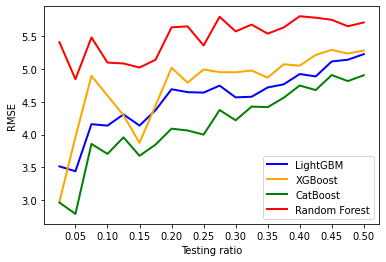

In [24]:
plt.plot(ratio, list17, lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list19, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list21, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list23, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=4)
plt.show()

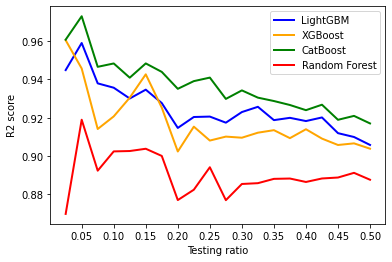

In [25]:
plt.plot(ratio, list18,  lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list20, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list22, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list24, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [17]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lgbm.fit(X_train, y_train) 
xgb.fit(X_train, y_train) 
cat.fit(X_train, y_train) 
rdf.fit(X_train, y_train)

# training and testing with different models and different categorical feature handling methods
y_pred_lgbm=lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_rdf = rdf.predict(X_test)
    
print("Model           RMSE      R2") 
print("LightGBM       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)), r2_score(y_test, y_pred_lgbm))) 
print("XGBoost        {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb)))
print("CatBoost       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_cat)), r2_score(y_test, y_pred_cat)))
print("Random Forest  {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_rdf)), r2_score(y_test, y_pred_rdf)))

Learning rate set to 0.040088
0:	learn: 16.3780736	total: 1.5ms	remaining: 1.5s
1:	learn: 15.9686949	total: 2.74ms	remaining: 1.37s
2:	learn: 15.6387945	total: 3.79ms	remaining: 1.26s
3:	learn: 15.2547883	total: 4.91ms	remaining: 1.22s
4:	learn: 14.8805369	total: 6.16ms	remaining: 1.23s
5:	learn: 14.5318305	total: 7.49ms	remaining: 1.24s
6:	learn: 14.2353749	total: 8.56ms	remaining: 1.22s
7:	learn: 13.9234688	total: 9.74ms	remaining: 1.21s
8:	learn: 13.6127521	total: 10.9ms	remaining: 1.2s
9:	learn: 13.3158035	total: 12.2ms	remaining: 1.21s
10:	learn: 13.0189866	total: 13.3ms	remaining: 1.2s
11:	learn: 12.7521378	total: 14.4ms	remaining: 1.19s
12:	learn: 12.5024558	total: 15.5ms	remaining: 1.18s
13:	learn: 12.2515884	total: 16.6ms	remaining: 1.17s
14:	learn: 11.9914358	total: 17.7ms	remaining: 1.16s
15:	learn: 11.7564018	total: 18.8ms	remaining: 1.15s
16:	learn: 11.5296967	total: 20ms	remaining: 1.15s
17:	learn: 11.3069595	total: 21.3ms	remaining: 1.16s
18:	learn: 11.1219247	total: 22.

168:	learn: 4.1661492	total: 171ms	remaining: 838ms
169:	learn: 4.1596965	total: 171ms	remaining: 837ms
170:	learn: 4.1507487	total: 173ms	remaining: 836ms
171:	learn: 4.1373586	total: 173ms	remaining: 835ms
172:	learn: 4.1305204	total: 174ms	remaining: 833ms
173:	learn: 4.1220304	total: 175ms	remaining: 832ms
174:	learn: 4.1145428	total: 176ms	remaining: 830ms
175:	learn: 4.1098832	total: 177ms	remaining: 828ms
176:	learn: 4.0982234	total: 178ms	remaining: 827ms
177:	learn: 4.0921719	total: 179ms	remaining: 826ms
178:	learn: 4.0822390	total: 180ms	remaining: 824ms
179:	learn: 4.0730025	total: 181ms	remaining: 823ms
180:	learn: 4.0626456	total: 181ms	remaining: 821ms
181:	learn: 4.0555661	total: 182ms	remaining: 819ms
182:	learn: 4.0512843	total: 183ms	remaining: 818ms
183:	learn: 4.0452630	total: 184ms	remaining: 817ms
184:	learn: 4.0378337	total: 185ms	remaining: 815ms
185:	learn: 4.0289575	total: 186ms	remaining: 814ms
186:	learn: 4.0165661	total: 187ms	remaining: 812ms
187:	learn: 

357:	learn: 3.0592585	total: 341ms	remaining: 612ms
358:	learn: 3.0563004	total: 342ms	remaining: 611ms
359:	learn: 3.0550774	total: 343ms	remaining: 610ms
360:	learn: 3.0527309	total: 344ms	remaining: 609ms
361:	learn: 3.0506801	total: 345ms	remaining: 608ms
362:	learn: 3.0460628	total: 346ms	remaining: 607ms
363:	learn: 3.0416081	total: 347ms	remaining: 606ms
364:	learn: 3.0404228	total: 347ms	remaining: 604ms
365:	learn: 3.0356562	total: 348ms	remaining: 603ms
366:	learn: 3.0329855	total: 349ms	remaining: 602ms
367:	learn: 3.0318428	total: 350ms	remaining: 601ms
368:	learn: 3.0260467	total: 351ms	remaining: 600ms
369:	learn: 3.0231298	total: 352ms	remaining: 599ms
370:	learn: 3.0167090	total: 353ms	remaining: 598ms
371:	learn: 3.0149624	total: 353ms	remaining: 597ms
372:	learn: 3.0106295	total: 354ms	remaining: 596ms
373:	learn: 3.0081957	total: 355ms	remaining: 595ms
374:	learn: 3.0046885	total: 356ms	remaining: 594ms
375:	learn: 3.0013341	total: 357ms	remaining: 593ms
376:	learn: 

552:	learn: 2.5248537	total: 513ms	remaining: 415ms
553:	learn: 2.5236710	total: 514ms	remaining: 414ms
554:	learn: 2.5226440	total: 515ms	remaining: 413ms
555:	learn: 2.5209772	total: 516ms	remaining: 412ms
556:	learn: 2.5196129	total: 517ms	remaining: 411ms
557:	learn: 2.5174751	total: 518ms	remaining: 410ms
558:	learn: 2.5162337	total: 519ms	remaining: 409ms
559:	learn: 2.5153705	total: 520ms	remaining: 408ms
560:	learn: 2.5142484	total: 521ms	remaining: 407ms
561:	learn: 2.5118748	total: 522ms	remaining: 406ms
562:	learn: 2.5103967	total: 522ms	remaining: 405ms
563:	learn: 2.5071447	total: 523ms	remaining: 405ms
564:	learn: 2.5048777	total: 524ms	remaining: 404ms
565:	learn: 2.5009989	total: 525ms	remaining: 403ms
566:	learn: 2.5001748	total: 526ms	remaining: 402ms
567:	learn: 2.4993882	total: 527ms	remaining: 401ms
568:	learn: 2.4972279	total: 528ms	remaining: 400ms
569:	learn: 2.4949991	total: 529ms	remaining: 399ms
570:	learn: 2.4924230	total: 530ms	remaining: 398ms
571:	learn: 

743:	learn: 2.1922566	total: 685ms	remaining: 236ms
744:	learn: 2.1908018	total: 686ms	remaining: 235ms
745:	learn: 2.1902697	total: 687ms	remaining: 234ms
746:	learn: 2.1885119	total: 688ms	remaining: 233ms
747:	learn: 2.1873967	total: 688ms	remaining: 232ms
748:	learn: 2.1867276	total: 689ms	remaining: 231ms
749:	learn: 2.1849625	total: 690ms	remaining: 230ms
750:	learn: 2.1833406	total: 691ms	remaining: 229ms
751:	learn: 2.1823458	total: 692ms	remaining: 228ms
752:	learn: 2.1805168	total: 693ms	remaining: 227ms
753:	learn: 2.1795546	total: 694ms	remaining: 226ms
754:	learn: 2.1775099	total: 695ms	remaining: 225ms
755:	learn: 2.1761889	total: 695ms	remaining: 224ms
756:	learn: 2.1747535	total: 696ms	remaining: 224ms
757:	learn: 2.1731395	total: 697ms	remaining: 223ms
758:	learn: 2.1717976	total: 698ms	remaining: 222ms
759:	learn: 2.1705599	total: 699ms	remaining: 221ms
760:	learn: 2.1693738	total: 700ms	remaining: 220ms
761:	learn: 2.1681801	total: 701ms	remaining: 219ms
762:	learn: 

945:	learn: 1.9693843	total: 857ms	remaining: 48.9ms
946:	learn: 1.9691754	total: 858ms	remaining: 48ms
947:	learn: 1.9680973	total: 859ms	remaining: 47.1ms
948:	learn: 1.9671373	total: 860ms	remaining: 46.2ms
949:	learn: 1.9665086	total: 860ms	remaining: 45.3ms
950:	learn: 1.9656027	total: 861ms	remaining: 44.4ms
951:	learn: 1.9648157	total: 862ms	remaining: 43.5ms
952:	learn: 1.9634932	total: 863ms	remaining: 42.6ms
953:	learn: 1.9627667	total: 864ms	remaining: 41.6ms
954:	learn: 1.9616754	total: 865ms	remaining: 40.7ms
955:	learn: 1.9596725	total: 865ms	remaining: 39.8ms
956:	learn: 1.9596046	total: 866ms	remaining: 38.9ms
957:	learn: 1.9581001	total: 867ms	remaining: 38ms
958:	learn: 1.9579723	total: 868ms	remaining: 37.1ms
959:	learn: 1.9575858	total: 869ms	remaining: 36.2ms
960:	learn: 1.9566864	total: 869ms	remaining: 35.3ms
961:	learn: 1.9561853	total: 870ms	remaining: 34.4ms
962:	learn: 1.9552294	total: 871ms	remaining: 33.5ms
963:	learn: 1.9547143	total: 872ms	remaining: 32.6

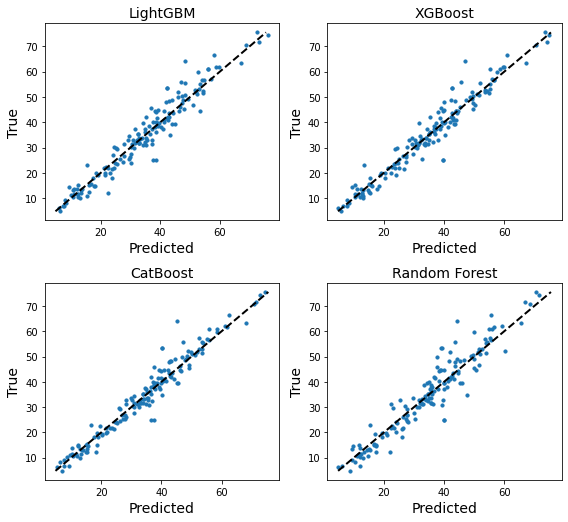

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lgbm, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("LightGBM", fontsize = 14) 

ax2.scatter(y_pred_xgb, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("XGBoost", fontsize = 14) 

ax3.scatter(y_pred_cat, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("CatBoost", fontsize = 14) 

ax4.scatter(y_pred_rdf, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Random Forest", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

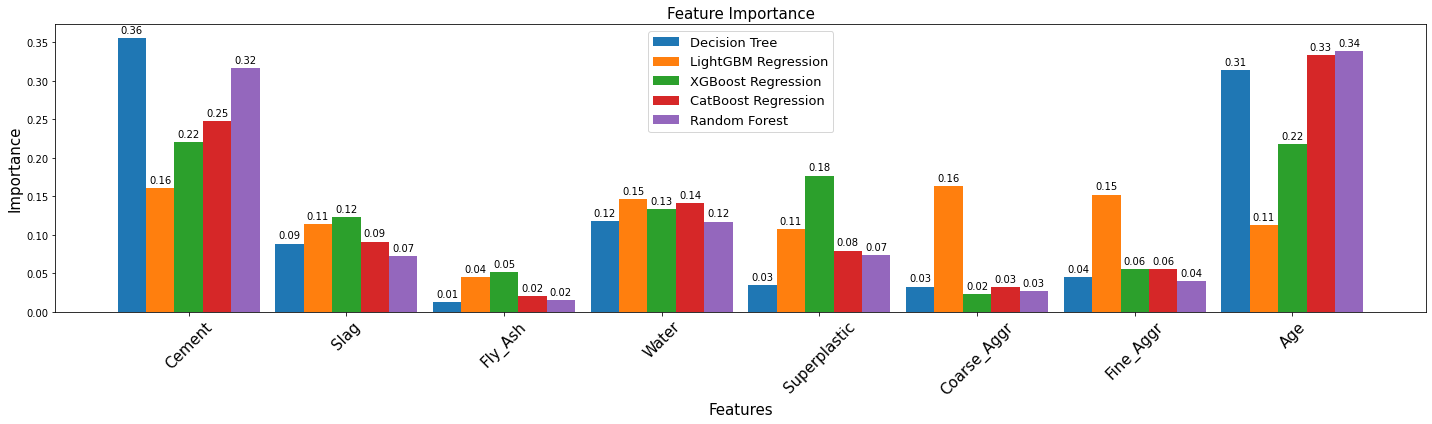

In [29]:
feature_dtr = dtr.feature_importances_ 
feature_lgbm = lgbm.feature_importances_
feature_xgb = xgb.feature_importances_ 
feature_cat = cat.feature_importances_
feature_rdf = rdf.feature_importances_ 

feature_lgbm = feature_lgbm/sum(feature_lgbm)
feature_cat = feature_cat/sum(feature_cat)

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.18
fig, ax = plt.subplots(figsize=(20,6)) 
rects1 = ax.bar(x-2*(width), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x-1*(width), feature_lgbm,width, label='LightGBM Regression') 
rects3 = ax.bar(x          , feature_xgb, width, label='XGBoost Regression') 
rects4 = ax.bar(x+1*(width), feature_cat, width, label='CatBoost Regression') 
rects5 = ax.bar(x+2*(width), feature_rdf, width, label='Random Forest') 

ax.set_ylabel('Importance', fontsize = 15) 
ax.set_xlabel('Features', fontsize = 15) 
ax.set_title('Feature Importance', fontsize = 15) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 15) 
ax.legend(loc=9, fontsize = 13) 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
autolabel(rects4) 
autolabel(rects5) 
fig.tight_layout() 
plt.show()